# mlrose_hiive Tutorial Examples - Genevieve Hayes

## Overview

mlrose_hiive is a Python package for applying some of the most common randomized optimization and search algorithms to a range of different optimization problems, over both discrete- and continuous-valued parameter spaces. This notebook contains the examples used in the mlrose_hiive tutorial.

### Import Libraries

In [1]:
import mlrose_hiive
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

### Example 1: 8-Queens Using Pre-Defined Fitness Function

In [81]:
import mlrose_hiive as mh
import numpy as np

peak_fitness = mlrose_hiive.FourPeaks(t_pct=0.15)
eval_curves = [] 

def eval_peak(state):
    global eval_curves
    
    fitness = peak_fitness.evaluate(state)
    eval_curves.append(fitness)
    return fitness

custom_fitness = mh.CustomFitness(eval_peak)
problem = mh.DiscreteOpt(length=64, fitness_fn=custom_fitness,  max_val=2)
# I did Simulated Annealing here
print(eval_curves)  # came out as 1046

[]


In [5]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [6]:
# Solve using simulated annealing - attempt 1  
eval_curves = []
init_state = np.array([1,1,1,0,1,0,0,1,0,0,0,0])
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
                                                      max_iters = 1000, init_state = None,
                                                      random_state = 42)

In [7]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  28.0


In [9]:
eval_curves

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 5,
 5,
 5,
 5,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 5,
 21,
 21,
 21,
 21,
 20,
 20,
 4,
 4,
 20,
 20,
 21,
 21,
 21,
 21,
 25,
 25,
 9,
 9,
 21,
 28,
 28,
 22,
 25,
 20,
 4,
 4,
 12,
 26,
 12,
 4,
 12,
 25,
 25,
 4,
 22,
 12,
 25,
 4,
 4,
 25,
 21,
 4,
 21,
 20,
 4,
 27,
 20,
 13,
 21,
 25,
 25,
 12,
 4,
 4,
 25,
 21,
 27,
 22,
 4,
 4,
 23,
 4,
 13,
 25,
 12,
 24,
 12,
 20,
 27,
 12,
 12,
 22,
 4,
 25,
 21,
 26,
 13,
 26,
 4,
 23,
 26,
 12,
 21,
 22,
 12,
 25,
 12,
 25,
 12,
 23,
 25,
 22,
 20,
 4,
 20,
 12,
 20,
 4,
 23,
 12,
 12,
 26,
 24,
 12,
 26,
 4,
 4,
 23,
 4,
 12,
 4,
 13,
 12,
 4,
 4,
 12,
 12,
 21,
 25,
 4,
 4]

In [10]:
# Solve using simulated annealing - attempt 2
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
                                                      max_iters = 1000, init_state = init_state,
                                                      random_state = 1)

In [11]:
print(best_state)

[7 0 7 4 1 5 3 1]


In [12]:
print(best_fitness)

0.0


# 8 Queens Greedy Search

In [10]:
  
import mlrose_hiive
from mlrose_hiive.decorators import short_name

from mlrose_hiive.runners._runner_base import _RunnerBase
from mlrose_hiive.runners.rhc_runner import RHCRunner
from mlrose_hiive.runners.sa_runner import SARunner
from mlrose_hiive.runners.ga_runner import GARunner
from mlrose_hiive.runners.mimic_runner import MIMICRunner

In [11]:
random_state = [1,42,  100]

In [12]:
#### RHC
experiment_name = 'example_experiment'

rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory='4peaks_rhc.csv',
                seed=100,
                iteration_list=[1000],
                max_attempts=100,
                restart_list=[0, 5, 10, 100])   
# the two data frames will contain the results
df_run_stats, df_run_curves = rhc.run()    

Running rhc
*****************
*** Run START ***
*****************
restarts:[0], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[4.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0]...

restarts:[0], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[138], done:[True], time:[0.01], fitness:[16.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[5], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[4.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0]...

restarts:[5], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[138], done:[True], time:[0.01], f

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[100], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[4.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0]...

restarts:[100], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[138], done:[True], time:[0.00], fitness:[16.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[100], max_iters:[1000], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.04], fitness:[0.0000]
	[0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1]...

restarts:[100], max_iters:[1000], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[246], done:[True], time:[0.05], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...

re

restarts:[100], max_iters:[1000], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.62], fitness:[1.0000]
	[1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0]...

restarts:[100], max_iters:[1000], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[156], done:[True], time:[1.66], fitness:[28.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]...

restarts:[100], max_iters:[1000], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.73], fitness:[1.0000]
	[0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0]...

restarts:[100], max_iters:[1000], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[195], done:[True], time:[1.78], fitness:[16.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[100], max_iters:[1000], current_restart:[20]
runner_name:[rhc], experiment_name:[example_e

restarts:[100], max_iters:[1000], current_restart:[37]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[4.75], fitness:[2.0000]
	[1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0]...

restarts:[100], max_iters:[1000], current_restart:[37]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[144], done:[True], time:[4.81], fitness:[28.0000]
	[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[100], max_iters:[1000], current_restart:[38]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[4.95], fitness:[1.0000]
	[0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0]...

restarts:[100], max_iters:[1000], current_restart:[38]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[223], done:[True], time:[5.10], fitness:[16.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[100], max_iters:[1000], current_restart:[39]
runner_name:[rhc], experiment_name:[example_e

restarts:[100], max_iters:[1000], current_restart:[55]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[335], done:[True], time:[9.54], fitness:[16.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[100], max_iters:[1000], current_restart:[56]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[9.67], fitness:[2.0000]
	[1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0]...

restarts:[100], max_iters:[1000], current_restart:[56]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[165], done:[True], time:[9.78], fitness:[28.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]...

restarts:[100], max_iters:[1000], current_restart:[57]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[9.90], fitness:[3.0000]
	[1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1]...

restarts:[100], max_iters:[1000], current_restart:[57]
runner_name:[rhc], experiment_name:[example_e

restarts:[100], max_iters:[1000], current_restart:[74]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[189], done:[True], time:[16.10], fitness:[16.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[100], max_iters:[1000], current_restart:[75]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[16.26], fitness:[2.0000]
	[1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0]...

restarts:[100], max_iters:[1000], current_restart:[75]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[163], done:[True], time:[16.40], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...

restarts:[100], max_iters:[1000], current_restart:[76]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[16.57], fitness:[1.0000]
	[1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1]...

restarts:[100], max_iters:[1000], current_restart:[76]
runner_name:[rhc], experiment_name:[examp

restarts:[100], max_iters:[1000], current_restart:[93]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[23.42], fitness:[1.0000]
	[0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0]...

restarts:[100], max_iters:[1000], current_restart:[93]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[197], done:[True], time:[23.67], fitness:[16.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[100], max_iters:[1000], current_restart:[94]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[23.88], fitness:[1.0000]
	[1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1]...

restarts:[100], max_iters:[1000], current_restart:[94]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[197], done:[True], time:[24.10], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...

restarts:[100], max_iters:[1000], current_restart:[95]
runner_name:[rhc], experiment_name:[examp

In [13]:
df_run_stats

,Iteration,Fitness,Time,State,Restarts,max_iters,current_restart
0,0,4.0,0.000168,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",0,1000,0
1,1000,16.0,0.009264,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,1000,0
2,0,4.0,0.000119,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",5,1000,0
3,1000,16.0,0.008486,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",5,1000,0
4,0,0.0,0.020525,"[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]",5,1000,1
...,...,...,...,...,...,...,...
233,1000,16.0,25.703771,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",100,1000,98
234,0,3.0,25.913253,"[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]",100,1000,99
235,1000,16.0,26.142335,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",100,1000,99
236,0,0.0,26.341666,"[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1]",100,1000,100


In [262]:
def avg_rhc_runner(random_state):
    
    rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory='8queens_rhc.csv',
                seed=0,
                iteration_list=range(100,2000,100),
                max_attempts=100,
                restart_list=range(10, 100, 10)) 
    df_run_stats, _ = rhc.run()
    df_run_stats['seed'] = 0
    for i in random_state:
        rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory='8queens_rhc.csv',
                seed=i,
                iteration_list=range(100,2000,100),
                max_attempts=100,
                restart_list=range(10, 100, 10)) 
        
        
        df_run_stats_local, _ = rhc.run()
        df_run_stats_local['seed'] = i 
        df_run_stats.append(df_run_stats_local)
        
    print (df_run_stats)
   # agg = df_run_stats.group_by(['Iteration', 'Restarts', 'max_iters']).mean()
    #print (agg)
    
    return df_run_stats
    

In [263]:
agg_rhc_new = avg_rhc_runner([1,42,100])

Running rhc
*****************
*** Run START ***
*****************
restarts:[10], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[1.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0]...

restarts:[10], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[mmc], attempt:[54], iteration:[100], done:[False], time:[0.01], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0]...

restarts:[10], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[mmc], attempt:[82], iteration:[200], done:[False], time:[0.05], fitness:[12.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0]...

restarts:[10],

restarts:[10], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[157], done:[True], time:[0.65], fitness:[5.0000]
	[1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0// 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1]...

restarts:[10], max_iters:[1900], current_restart:[7]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.68], fitness:[0.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1// 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1]...

restarts:[10], max_iters:[1900], current_restart:[7]
runner_name:[rhc], experiment_name:[mmc], attempt:[35], iteration:[100], done:[False], time:[0.69], fitness:[1.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1// 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0]...

restarts:[10], max_iters:[1900], current_restart:[7]
runner_name:[rhc], experiment

restarts:[20], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[39], iteration:[200], done:[False], time:[0.42], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1// 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1]...

restarts:[20], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[33], iteration:[300], done:[False], time:[0.47], fitness:[14.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1// 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1]...

restarts:[20], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[35], iteration:[400], done:[False], time:[0.55], fitness:[15.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1// 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1]...

restarts:[20], max_iters:[1900], current_restart:[3]
runner_name:[rhc], expe

restarts:[20], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[27], iteration:[200], done:[False], time:[2.05], fitness:[16.0000]
	[1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1// 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[20], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[24], iteration:[300], done:[False], time:[2.14], fitness:[25.0000]
	[1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1// 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[20], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[34], iteration:[400], done:[False], time:[2.25], fitness:[27.0000]
	[1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[20], max_iters:[1900], current_restart:[10]
runner_name:[rhc], 

restarts:[20], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[4.51], fitness:[0.0000]
	[0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0// 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1]...

restarts:[20], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[51], iteration:[100], done:[False], time:[4.55], fitness:[1.0000]
	[0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0// 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0]...

restarts:[20], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[150], done:[True], time:[4.65], fitness:[1.0000]
	[0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0// 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0]...

restarts:[20], max_iters:[1900], current_restart:[20]
runner_name:[rhc], experi

restarts:[30], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[41], iteration:[200], done:[False], time:[2.01], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0// 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1]...

restarts:[30], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[260], done:[True], time:[2.14], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0// 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1]...

restarts:[30], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[2.24], fitness:[3.0000]
	[1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0// 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1]...

restarts:[30], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment

restarts:[30], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[37], iteration:[200], done:[False], time:[5.02], fitness:[5.0000]
	[0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1// 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[264], done:[True], time:[5.18], fitness:[5.0000]
	[0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1// 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[13]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[5.30], fitness:[0.0000]
	[0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1// 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1]...

restarts:[30], max_iters:[1900], current_restart:[13]
runner_name:[rhc], experi

restarts:[30], max_iters:[1900], current_restart:[21]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[222], done:[True], time:[8.17], fitness:[4.0000]
	[1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0// 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0]...

restarts:[30], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[8.32], fitness:[1.0000]
	[1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0// 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1]...

restarts:[30], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[62], iteration:[100], done:[False], time:[8.36], fitness:[5.0000]
	[1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0// 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1]...

restarts:[30], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experi

restarts:[30], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[140], done:[True], time:[12.12], fitness:[9.0000]
	[1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0// 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[40], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[1.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0]...

restarts:[40], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[mmc], attempt:[54], iteration:[100], done:[False], time:[0.00], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 

restarts:[40], max_iters:[1900], current_restart:[7]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[4.63], fitness:[0.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1// 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1]...

restarts:[40], max_iters:[1900], current_restart:[7]
runner_name:[rhc], experiment_name:[mmc], attempt:[35], iteration:[100], done:[False], time:[4.65], fitness:[1.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1// 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0]...

restarts:[40], max_iters:[1900], current_restart:[7]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[166], done:[True], time:[4.85], fitness:[1.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1// 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0]...

restarts:[40], max_iters:[1900], current_restart:[8]
runner_name:[rhc], experiment

restarts:[40], max_iters:[1900], current_restart:[13]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[177], done:[True], time:[8.84], fitness:[6.0000]
	[1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1// 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1]...

restarts:[40], max_iters:[1900], current_restart:[14]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[9.04], fitness:[1.0000]
	[0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1// 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0]...

restarts:[40], max_iters:[1900], current_restart:[14]
runner_name:[rhc], experiment_name:[mmc], attempt:[68], iteration:[100], done:[False], time:[9.07], fitness:[5.0000]
	[1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1// 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0]...

restarts:[40], max_iters:[1900], current_restart:[14]
runner_name:[rhc], experi

restarts:[40], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[266], done:[True], time:[13.11], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0// 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1]...

restarts:[40], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[13.36], fitness:[2.0000]
	[1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0// 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1]...

restarts:[40], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[13.40], fitness:[2.0000]
	[1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0// 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1]...

restarts:[40], max_iters:[1900], current_restart:[24]
runner_name:[rhc], ex

restarts:[40], max_iters:[1900], current_restart:[31]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[141], done:[True], time:[18.78], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0// 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0]...

restarts:[40], max_iters:[1900], current_restart:[32]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[19.04], fitness:[4.0000]
	[1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1// 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1]...

restarts:[40], max_iters:[1900], current_restart:[32]
runner_name:[rhc], experiment_name:[mmc], attempt:[31], iteration:[100], done:[False], time:[19.08], fitness:[6.0000]
	[1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1// 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1]...

restarts:[40], max_iters:[1900], current_restart:[32]
runner_name:[rhc], exp

restarts:[40], max_iters:[1900], current_restart:[36]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[25.53], fitness:[1.0000]
	[1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1// 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1]...

restarts:[40], max_iters:[1900], current_restart:[36]
runner_name:[rhc], experiment_name:[mmc], attempt:[36], iteration:[100], done:[False], time:[25.58], fitness:[4.0000]
	[1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1// 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1]...

restarts:[40], max_iters:[1900], current_restart:[36]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[165], done:[True], time:[25.86], fitness:[4.0000]
	[1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1// 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1]...

restarts:[40], max_iters:[1900], current_restart:[37]
runner_name:[rhc], exp

restarts:[50], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[1.09], fitness:[1.0000]
	[0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1// 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0]...

restarts:[50], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[mmc], attempt:[9], iteration:[100], done:[False], time:[1.10], fitness:[9.0000]
	[0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1// 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[192], done:[True], time:[1.42], fitness:[9.0000]
	[0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1// 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[2]
runner_name:[rhc], experiment_

restarts:[50], max_iters:[1900], current_restart:[8]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[7.63], fitness:[0.0000]
	[0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1// 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1]...

restarts:[50], max_iters:[1900], current_restart:[8]
runner_name:[rhc], experiment_name:[mmc], attempt:[44], iteration:[100], done:[False], time:[7.65], fitness:[1.0000]
	[1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1// 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1]...

restarts:[50], max_iters:[1900], current_restart:[8]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[157], done:[True], time:[8.00], fitness:[1.0000]
	[1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1// 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1]...

restarts:[50], max_iters:[1900], current_restart:[9]
runner_name:[rhc], experiment

restarts:[50], max_iters:[1900], current_restart:[14]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[133], done:[True], time:[15.25], fitness:[5.0000]
	[1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1// 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0]...

restarts:[50], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[15.59], fitness:[0.0000]
	[0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0// 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1]...

restarts:[50], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[mmc], attempt:[88], iteration:[100], done:[False], time:[15.62], fitness:[2.0000]
	[0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0// 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0]...

restarts:[50], max_iters:[1900], current_restart:[15]
runner_name:[rhc], exp

restarts:[50], max_iters:[1900], current_restart:[24]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[21.42], fitness:[1.0000]
	[0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0// 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[24]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[21.45], fitness:[1.0000]
	[0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0// 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[25]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[21.80], fitness:[1.0000]
	[1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0// 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1]...

restarts:[50], max_iters:[1900], current_restart:[25]
runner_name:[rhc], experi

restarts:[50], max_iters:[1900], current_restart:[32]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[170], done:[True], time:[28.84], fitness:[6.0000]
	[1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1// 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1]...

restarts:[50], max_iters:[1900], current_restart:[33]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[29.17], fitness:[0.0000]
	[0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0// 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1]...

restarts:[50], max_iters:[1900], current_restart:[33]
runner_name:[rhc], experiment_name:[mmc], attempt:[19], iteration:[100], done:[False], time:[29.25], fitness:[2.0000]
	[0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0// 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0]...

restarts:[50], max_iters:[1900], current_restart:[33]
runner_name:[rhc], exp

restarts:[50], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[39.28], fitness:[0.0000]
	[0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0// 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1]...

restarts:[50], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[70], iteration:[100], done:[False], time:[39.35], fitness:[5.0000]
	[1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0// 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0]...

restarts:[50], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[63], iteration:[200], done:[False], time:[39.80], fitness:[14.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0// 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0]...

restarts:[50], max_iters:[1900], current_restart:[37]
runner_name:[rhc], ex

restarts:[50], max_iters:[1900], current_restart:[43]
runner_name:[rhc], experiment_name:[mmc], attempt:[99], iteration:[200], done:[False], time:[48.25], fitness:[4.0000]
	[0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0// 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[43]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[202], done:[True], time:[48.62], fitness:[4.0000]
	[0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0// 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[44]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[49.04], fitness:[2.0000]
	[1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1// 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0]...

restarts:[50], max_iters:[1900], current_restart:[44]
runner_name:[rhc], exp

restarts:[50], max_iters:[1900], current_restart:[48]
runner_name:[rhc], experiment_name:[mmc], attempt:[9], iteration:[200], done:[False], time:[59.08], fitness:[21.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0// 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1]...

restarts:[50], max_iters:[1900], current_restart:[48]
runner_name:[rhc], experiment_name:[mmc], attempt:[23], iteration:[300], done:[False], time:[59.59], fitness:[23.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0// 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1]...

restarts:[50], max_iters:[1900], current_restart:[48]
runner_name:[rhc], experiment_name:[mmc], attempt:[45], iteration:[400], done:[False], time:[60.07], fitness:[29.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0// 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1]...

restarts:[50], max_iters:[1900], current_restart:[48]
runner_name:[rhc]

restarts:[60], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[35], iteration:[400], done:[False], time:[4.18], fitness:[15.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1// 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1]...

restarts:[60], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[466], done:[True], time:[4.62], fitness:[15.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1// 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1]...

restarts:[60], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[5.08], fitness:[2.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0// 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1]...

restarts:[60], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experime

restarts:[60], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[24], iteration:[300], done:[False], time:[13.13], fitness:[25.0000]
	[1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1// 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[34], iteration:[400], done:[False], time:[13.58], fitness:[27.0000]
	[1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[50], iteration:[500], done:[False], time:[14.02], fitness:[29.0000]
	[1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[10]
runner_name:[rhc

restarts:[60], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[22.69], fitness:[0.0000]
	[0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0// 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1]...

restarts:[60], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[51], iteration:[100], done:[False], time:[22.73], fitness:[1.0000]
	[0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0// 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0]...

restarts:[60], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[150], done:[True], time:[23.19], fitness:[1.0000]
	[0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0// 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0]...

restarts:[60], max_iters:[1900], current_restart:[20]
runner_name:[rhc], exp

restarts:[60], max_iters:[1900], current_restart:[27]
runner_name:[rhc], experiment_name:[mmc], attempt:[38], iteration:[200], done:[False], time:[32.08], fitness:[12.0000]
	[0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0// 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[27]
runner_name:[rhc], experiment_name:[mmc], attempt:[71], iteration:[300], done:[False], time:[32.61], fitness:[21.0000]
	[0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0// 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[27]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[330], done:[True], time:[33.08], fitness:[21.0000]
	[0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0// 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[28]
runner_name:[rhc

restarts:[60], max_iters:[1900], current_restart:[34]
runner_name:[rhc], experiment_name:[mmc], attempt:[55], iteration:[300], done:[False], time:[42.71], fitness:[14.0000]
	[1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0// 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[34]
runner_name:[rhc], experiment_name:[mmc], attempt:[33], iteration:[400], done:[False], time:[43.27], fitness:[20.0000]
	[1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0// 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[34]
runner_name:[rhc], experiment_name:[mmc], attempt:[79], iteration:[500], done:[False], time:[43.82], fitness:[23.0000]
	[1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0// 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[34]
runner_name:[rhc

restarts:[60], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[92], iteration:[500], done:[False], time:[55.75], fitness:[36.0000]
	[0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[509], done:[True], time:[56.25], fitness:[36.0000]
	[0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[39]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[56.75], fitness:[1.0000]
	[1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0// 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0]...

restarts:[60], max_iters:[1900], current_restart:[39]
runner_name:[rhc], e

restarts:[60], max_iters:[1900], current_restart:[46]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[67.11], fitness:[6.0000]
	[0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0// 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[46]
runner_name:[rhc], experiment_name:[mmc], attempt:[19], iteration:[100], done:[False], time:[67.21], fitness:[7.0000]
	[0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0// 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[46]
runner_name:[rhc], experiment_name:[mmc], attempt:[53], iteration:[200], done:[False], time:[67.84], fitness:[11.0000]
	[0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0// 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[46]
runner_name:[rhc], ex

restarts:[60], max_iters:[1900], current_restart:[50]
runner_name:[rhc], experiment_name:[mmc], attempt:[22], iteration:[300], done:[False], time:[81.24], fitness:[13.0000]
	[0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1// 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[50]
runner_name:[rhc], experiment_name:[mmc], attempt:[67], iteration:[400], done:[False], time:[81.88], fitness:[17.0000]
	[0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1// 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[50]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[434], done:[True], time:[82.44], fitness:[17.0000]
	[0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1// 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[51]
runner_name:[rhc

restarts:[60], max_iters:[1900], current_restart:[54]
runner_name:[rhc], experiment_name:[mmc], attempt:[46], iteration:[700], done:[False], time:[96.45], fitness:[103.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[54]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[755], done:[True], time:[97.10], fitness:[103.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[55]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[97.66], fitness:[0.0000]
	[0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1// 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1]...

restarts:[60], max_iters:[1900], current_restart:[55]
runner_name:[rhc],

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[70], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[1.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0]...

restarts:[70], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[mmc], attempt:[54], iteration:[100], done:[False], time:[0.00], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0]...

restarts:[70], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[mmc], attempt:[82], iteration:[200], done:[False], time:[0.60], fitness:[12.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0

restarts:[70], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[157], done:[True], time:[12.16], fitness:[5.0000]
	[1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0// 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1]...

restarts:[70], max_iters:[1900], current_restart:[7]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[12.77], fitness:[0.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1// 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1]...

restarts:[70], max_iters:[1900], current_restart:[7]
runner_name:[rhc], experiment_name:[mmc], attempt:[35], iteration:[100], done:[False], time:[12.79], fitness:[1.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1// 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0]...

restarts:[70], max_iters:[1900], current_restart:[7]
runner_name:[rhc], experim

restarts:[70], max_iters:[1900], current_restart:[13]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[177], done:[True], time:[26.14], fitness:[6.0000]
	[1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1// 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1]...

restarts:[70], max_iters:[1900], current_restart:[14]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[26.73], fitness:[1.0000]
	[0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1// 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0]...

restarts:[70], max_iters:[1900], current_restart:[14]
runner_name:[rhc], experiment_name:[mmc], attempt:[68], iteration:[100], done:[False], time:[26.76], fitness:[5.0000]
	[1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1// 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0]...

restarts:[70], max_iters:[1900], current_restart:[14]
runner_name:[rhc], exp

restarts:[70], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[266], done:[True], time:[37.93], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0// 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1]...

restarts:[70], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[38.59], fitness:[2.0000]
	[1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0// 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1]...

restarts:[70], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[38.63], fitness:[2.0000]
	[1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0// 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1]...

restarts:[70], max_iters:[1900], current_restart:[24]
runner_name:[rhc], ex

restarts:[70], max_iters:[1900], current_restart:[31]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[141], done:[True], time:[51.69], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0// 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0]...

restarts:[70], max_iters:[1900], current_restart:[32]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[52.40], fitness:[4.0000]
	[1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1// 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1]...

restarts:[70], max_iters:[1900], current_restart:[32]
runner_name:[rhc], experiment_name:[mmc], attempt:[31], iteration:[100], done:[False], time:[52.45], fitness:[6.0000]
	[1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1// 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1]...

restarts:[70], max_iters:[1900], current_restart:[32]
runner_name:[rhc], exp

restarts:[70], max_iters:[1900], current_restart:[36]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[68.64], fitness:[1.0000]
	[1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1// 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1]...

restarts:[70], max_iters:[1900], current_restart:[36]
runner_name:[rhc], experiment_name:[mmc], attempt:[36], iteration:[100], done:[False], time:[68.71], fitness:[4.0000]
	[1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1// 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1]...

restarts:[70], max_iters:[1900], current_restart:[36]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[165], done:[True], time:[69.45], fitness:[4.0000]
	[1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1// 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1]...

restarts:[70], max_iters:[1900], current_restart:[37]
runner_name:[rhc], exp

restarts:[70], max_iters:[1900], current_restart:[43]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[84.77], fitness:[0.0000]
	[0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0// 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1]...

restarts:[70], max_iters:[1900], current_restart:[43]
runner_name:[rhc], experiment_name:[mmc], attempt:[25], iteration:[100], done:[False], time:[84.85], fitness:[2.0000]
	[0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0// 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0]...

restarts:[70], max_iters:[1900], current_restart:[43]
runner_name:[rhc], experiment_name:[mmc], attempt:[99], iteration:[200], done:[False], time:[85.62], fitness:[4.0000]
	[0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0// 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[43]
runner_name:[rhc], exp

restarts:[70], max_iters:[1900], current_restart:[47]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[699], done:[True], time:[104.86], fitness:[34.0000]
	[1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[48]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[105.58], fitness:[0.0000]
	[0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0// 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1]...

restarts:[70], max_iters:[1900], current_restart:[48]
runner_name:[rhc], experiment_name:[mmc], attempt:[7], iteration:[100], done:[False], time:[105.67], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0// 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1]...

restarts:[70], max_iters:[1900], current_restart:[48]
runner_name:[rhc], 

restarts:[70], max_iters:[1900], current_restart:[53]
runner_name:[rhc], experiment_name:[mmc], attempt:[60], iteration:[400], done:[False], time:[121.95], fitness:[13.0000]
	[0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1// 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[53]
runner_name:[rhc], experiment_name:[mmc], attempt:[65], iteration:[500], done:[False], time:[122.79], fitness:[17.0000]
	[0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1// 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[53]
runner_name:[rhc], experiment_name:[mmc], attempt:[11], iteration:[600], done:[False], time:[123.66], fitness:[27.0000]
	[0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[53]
runner_name:[

restarts:[70], max_iters:[1900], current_restart:[58]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[141.35], fitness:[2.0000]
	[1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0// 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1]...

restarts:[70], max_iters:[1900], current_restart:[58]
runner_name:[rhc], experiment_name:[mmc], attempt:[26], iteration:[100], done:[False], time:[141.47], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0// 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1]...

restarts:[70], max_iters:[1900], current_restart:[58]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[175], done:[True], time:[142.33], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0// 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1]...

restarts:[70], max_iters:[1900], current_restart:[59]
runner_name:[rhc], 

restarts:[70], max_iters:[1900], current_restart:[65]
runner_name:[rhc], experiment_name:[mmc], attempt:[82], iteration:[200], done:[False], time:[157.54], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1// 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0]...

restarts:[70], max_iters:[1900], current_restart:[65]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[219], done:[True], time:[158.29], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1// 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0]...

restarts:[70], max_iters:[1900], current_restart:[66]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[159.04], fitness:[1.0000]
	[1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0// 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1]...

restarts:[70], max_iters:[1900], current_restart:[66]
runner_name:[rhc]

restarts:[80], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[2.35], fitness:[1.0000]
	[0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1// 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0]...

restarts:[80], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[mmc], attempt:[9], iteration:[100], done:[False], time:[2.36], fitness:[9.0000]
	[0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1// 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[192], done:[True], time:[3.17], fitness:[9.0000]
	[0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1// 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[2]
runner_name:[rhc], experiment_

restarts:[80], max_iters:[1900], current_restart:[8]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[18.33], fitness:[0.0000]
	[0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1// 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1]...

restarts:[80], max_iters:[1900], current_restart:[8]
runner_name:[rhc], experiment_name:[mmc], attempt:[44], iteration:[100], done:[False], time:[18.35], fitness:[1.0000]
	[1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1// 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1]...

restarts:[80], max_iters:[1900], current_restart:[8]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[157], done:[True], time:[19.19], fitness:[1.0000]
	[1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1// 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1]...

restarts:[80], max_iters:[1900], current_restart:[9]
runner_name:[rhc], experim

restarts:[80], max_iters:[1900], current_restart:[14]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[133], done:[True], time:[35.24], fitness:[5.0000]
	[1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1// 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0]...

restarts:[80], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[36.02], fitness:[0.0000]
	[0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0// 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[mmc], attempt:[88], iteration:[100], done:[False], time:[36.04], fitness:[2.0000]
	[0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0// 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0]...

restarts:[80], max_iters:[1900], current_restart:[15]
runner_name:[rhc], exp

restarts:[80], max_iters:[1900], current_restart:[24]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[50.42], fitness:[1.0000]
	[0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0// 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0]...

restarts:[80], max_iters:[1900], current_restart:[24]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[50.45], fitness:[1.0000]
	[0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0// 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0]...

restarts:[80], max_iters:[1900], current_restart:[25]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[51.27], fitness:[1.0000]
	[1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0// 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[25]
runner_name:[rhc], experi

restarts:[80], max_iters:[1900], current_restart:[32]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[170], done:[True], time:[66.91], fitness:[6.0000]
	[1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1// 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1]...

restarts:[80], max_iters:[1900], current_restart:[33]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[67.73], fitness:[0.0000]
	[0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0// 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1]...

restarts:[80], max_iters:[1900], current_restart:[33]
runner_name:[rhc], experiment_name:[mmc], attempt:[19], iteration:[100], done:[False], time:[67.77], fitness:[2.0000]
	[0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0// 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0]...

restarts:[80], max_iters:[1900], current_restart:[33]
runner_name:[rhc], exp

restarts:[80], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[87.70], fitness:[0.0000]
	[0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0// 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1]...

restarts:[80], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[70], iteration:[100], done:[False], time:[87.76], fitness:[5.0000]
	[1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0// 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0]...

restarts:[80], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[63], iteration:[200], done:[False], time:[88.65], fitness:[14.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0// 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0]...

restarts:[80], max_iters:[1900], current_restart:[37]
runner_name:[rhc], ex

restarts:[80], max_iters:[1900], current_restart:[43]
runner_name:[rhc], experiment_name:[mmc], attempt:[99], iteration:[200], done:[False], time:[106.22], fitness:[4.0000]
	[0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0// 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[43]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[202], done:[True], time:[107.09], fitness:[4.0000]
	[0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0// 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[44]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[107.97], fitness:[2.0000]
	[1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1// 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0]...

restarts:[80], max_iters:[1900], current_restart:[44]
runner_name:[rhc], 

restarts:[80], max_iters:[1900], current_restart:[48]
runner_name:[rhc], experiment_name:[mmc], attempt:[9], iteration:[200], done:[False], time:[128.36], fitness:[21.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0// 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1]...

restarts:[80], max_iters:[1900], current_restart:[48]
runner_name:[rhc], experiment_name:[mmc], attempt:[23], iteration:[300], done:[False], time:[129.38], fitness:[23.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0// 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1]...

restarts:[80], max_iters:[1900], current_restart:[48]
runner_name:[rhc], experiment_name:[mmc], attempt:[45], iteration:[400], done:[False], time:[130.37], fitness:[29.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0// 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1]...

restarts:[80], max_iters:[1900], current_restart:[48]
runner_name:[r

restarts:[80], max_iters:[1900], current_restart:[53]
runner_name:[rhc], experiment_name:[mmc], attempt:[16], iteration:[700], done:[False], time:[150.46], fitness:[31.0000]
	[0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[53]
runner_name:[rhc], experiment_name:[mmc], attempt:[30], iteration:[800], done:[False], time:[151.46], fitness:[38.0000]
	[0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[53]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[871], done:[True], time:[152.43], fitness:[38.0000]
	[0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[54]
runner_name:[

restarts:[80], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[172.55], fitness:[0.0000]
	[0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0// 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1]...

restarts:[80], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[65], iteration:[100], done:[False], time:[172.66], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0// 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1]...

restarts:[80], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[136], done:[True], time:[173.61], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0// 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1]...

restarts:[80], max_iters:[1900], current_restart:[60]
runner_name:[rhc], 

restarts:[80], max_iters:[1900], current_restart:[66]
runner_name:[rhc], experiment_name:[mmc], attempt:[53], iteration:[200], done:[False], time:[194.54], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0// 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[66]
runner_name:[rhc], experiment_name:[mmc], attempt:[85], iteration:[300], done:[False], time:[195.59], fitness:[12.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0// 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[66]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[316], done:[True], time:[196.55], fitness:[12.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0// 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[67]
runner_name:[

restarts:[80], max_iters:[1900], current_restart:[72]
runner_name:[rhc], experiment_name:[mmc], attempt:[13], iteration:[600], done:[False], time:[217.72], fitness:[39.0000]
	[1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[72]
runner_name:[rhc], experiment_name:[mmc], attempt:[9], iteration:[700], done:[False], time:[218.82], fitness:[43.0000]
	[1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[72]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[792], done:[True], time:[219.88], fitness:[43.0000]
	[1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[73]
runner_name:[r

restarts:[80], max_iters:[1900], current_restart:[78]
runner_name:[rhc], experiment_name:[mmc], attempt:[48], iteration:[300], done:[False], time:[239.78], fitness:[13.0000]
	[1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0// 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[78]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[353], done:[True], time:[240.77], fitness:[13.0000]
	[1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0// 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[79]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[241.56], fitness:[2.0000]
	[0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1// 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0]...

restarts:[80], max_iters:[1900], current_restart:[79]
runner_name:[rhc]

restarts:[90], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[1], iteration:[200], done:[False], time:[10.97], fitness:[17.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0// 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[68], iteration:[300], done:[False], time:[11.82], fitness:[24.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0// 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[333], done:[True], time:[12.65], fitness:[24.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0// 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[5]
runner_name:[rhc], ex

restarts:[90], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[633], done:[True], time:[28.93], fitness:[31.0000]
	[1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[11]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[29.76], fitness:[2.0000]
	[0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0// 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[11]
runner_name:[rhc], experiment_name:[mmc], attempt:[94], iteration:[100], done:[False], time:[29.78], fitness:[3.0000]
	[0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0// 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[11]
runner_name:[rhc], ex

restarts:[90], max_iters:[1900], current_restart:[20]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[44.85], fitness:[2.0000]
	[1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0// 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[20]
runner_name:[rhc], experiment_name:[mmc], attempt:[84], iteration:[100], done:[False], time:[44.88], fitness:[5.0000]
	[1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0// 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[20]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[117], done:[True], time:[45.80], fitness:[5.0000]
	[1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0// 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[21]
runner_name:[rhc], exp

restarts:[90], max_iters:[1900], current_restart:[27]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[330], done:[True], time:[62.63], fitness:[21.0000]
	[0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0// 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[28]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[63.53], fitness:[3.0000]
	[0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1// 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[28]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[63.57], fitness:[3.0000]
	[0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1// 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[29]
runner_name:[rhc], ex

restarts:[90], max_iters:[1900], current_restart:[34]
runner_name:[rhc], experiment_name:[mmc], attempt:[79], iteration:[500], done:[False], time:[81.52], fitness:[23.0000]
	[1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0// 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[34]
runner_name:[rhc], experiment_name:[mmc], attempt:[20], iteration:[600], done:[False], time:[82.43], fitness:[34.0000]
	[1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[34]
runner_name:[rhc], experiment_name:[mmc], attempt:[72], iteration:[700], done:[False], time:[83.34], fitness:[36.0000]
	[1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[34]
runner_name:[rhc

restarts:[90], max_iters:[1900], current_restart:[39]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[103.56], fitness:[1.0000]
	[1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0// 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[39]
runner_name:[rhc], experiment_name:[mmc], attempt:[46], iteration:[100], done:[False], time:[103.61], fitness:[2.0000]
	[1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0// 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[39]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[155], done:[True], time:[104.55], fitness:[2.0000]
	[1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0// 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[40]
runner_name:[rhc], 

restarts:[90], max_iters:[1900], current_restart:[46]
runner_name:[rhc], experiment_name:[mmc], attempt:[53], iteration:[200], done:[False], time:[122.37], fitness:[11.0000]
	[0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0// 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[46]
runner_name:[rhc], experiment_name:[mmc], attempt:[4], iteration:[300], done:[False], time:[123.31], fitness:[14.0000]
	[0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0// 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[46]
runner_name:[rhc], experiment_name:[mmc], attempt:[7], iteration:[400], done:[False], time:[124.28], fitness:[16.0000]
	[0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0// 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[46]
runner_name:[rh

restarts:[90], max_iters:[1900], current_restart:[50]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[434], done:[True], time:[145.76], fitness:[17.0000]
	[0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1// 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[51]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[146.79], fitness:[6.0000]
	[0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1// 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[51]
runner_name:[rhc], experiment_name:[mmc], attempt:[25], iteration:[100], done:[False], time:[146.86], fitness:[11.0000]
	[0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1// 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[51]
runner_name:[rhc]

restarts:[90], max_iters:[1900], current_restart:[55]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[169.71], fitness:[0.0000]
	[0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1// 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[55]
runner_name:[rhc], experiment_name:[mmc], attempt:[67], iteration:[100], done:[False], time:[169.81], fitness:[6.0000]
	[1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1// 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[55]
runner_name:[rhc], experiment_name:[mmc], attempt:[88], iteration:[200], done:[False], time:[170.86], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1// 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[55]
runner_name:[rhc], 

restarts:[90], max_iters:[1900], current_restart:[61]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[122], done:[True], time:[190.69], fitness:[9.0000]
	[1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0// 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[62]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[191.68], fitness:[1.0000]
	[1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0// 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1]...

restarts:[90], max_iters:[1900], current_restart:[62]
runner_name:[rhc], experiment_name:[mmc], attempt:[12], iteration:[100], done:[False], time:[191.77], fitness:[2.0000]
	[1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0// 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1]...

restarts:[90], max_iters:[1900], current_restart:[62]
runner_name:[rhc], 

restarts:[90], max_iters:[1900], current_restart:[68]
runner_name:[rhc], experiment_name:[mmc], attempt:[82], iteration:[200], done:[False], time:[212.84], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1// 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[68]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[219], done:[True], time:[213.90], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1// 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[69]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[214.90], fitness:[1.0000]
	[1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1// 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[69]
runner_name:[rhc], 

restarts:[90], max_iters:[1900], current_restart:[75]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[236.12], fitness:[1.0000]
	[0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1// 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0]...

restarts:[90], max_iters:[1900], current_restart:[75]
runner_name:[rhc], experiment_name:[mmc], attempt:[51], iteration:[100], done:[False], time:[236.24], fitness:[6.0000]
	[1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1// 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[75]
runner_name:[rhc], experiment_name:[mmc], attempt:[74], iteration:[200], done:[False], time:[237.39], fitness:[10.0000]
	[1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1// 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[75]
runner_name:[rhc],

restarts:[90], max_iters:[1900], current_restart:[82]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[258.86], fitness:[0.0000]
	[0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1// 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[82]
runner_name:[rhc], experiment_name:[mmc], attempt:[39], iteration:[100], done:[False], time:[258.99], fitness:[1.0000]
	[0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1// 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[82]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[162], done:[True], time:[260.28], fitness:[1.0000]
	[0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1// 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[83]
runner_name:[rhc], 

restarts:[90], max_iters:[1900], current_restart:[88]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[349], done:[True], time:[282.65], fitness:[15.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0// 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0]...

restarts:[90], max_iters:[1900], current_restart:[89]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[283.70], fitness:[0.0000]
	[0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1// 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[89]
runner_name:[rhc], experiment_name:[mmc], attempt:[38], iteration:[100], done:[False], time:[283.86], fitness:[3.0000]
	[1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1// 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[89]
runner_name:[rhc],

restarts:[10], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[11], iteration:[100], done:[False], time:[0.40], fitness:[3.0000]
	[1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0// 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1]...

restarts:[10], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[53], iteration:[200], done:[False], time:[0.43], fitness:[4.0000]
	[1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0// 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1]...

restarts:[10], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[248], done:[True], time:[0.46], fitness:[4.0000]
	[1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0// 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1]...

restarts:[10], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experim

restarts:[20], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[mmc], attempt:[12], iteration:[200], done:[False], time:[0.14], fitness:[16.0000]
	[1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1// 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[20], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[289], done:[True], time:[0.18], fitness:[16.0000]
	[1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1// 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[20], max_iters:[1900], current_restart:[2]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.22], fitness:[0.0000]
	[0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0// 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1]...

restarts:[20], max_iters:[1900], current_restart:[2]
runner_name:[rhc], experime

restarts:[20], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[46], iteration:[300], done:[False], time:[1.50], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0// 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0]...

restarts:[20], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[66], iteration:[400], done:[False], time:[1.58], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0// 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0]...

restarts:[20], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[435], done:[True], time:[1.64], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0// 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0]...

restarts:[20], max_iters:[1900], current_restart:[7]
runner_name:[rhc], expe

restarts:[20], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[181], done:[True], time:[3.15], fitness:[3.0000]
	[0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0// 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0]...

restarts:[20], max_iters:[1900], current_restart:[16]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[3.24], fitness:[1.0000]
	[0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0// 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0]...

restarts:[20], max_iters:[1900], current_restart:[16]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[3.27], fitness:[1.0000]
	[0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0// 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0]...

restarts:[20], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experi

restarts:[30], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.71], fitness:[1.0000]
	[0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1// 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0]...

restarts:[30], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[35], iteration:[100], done:[False], time:[0.72], fitness:[3.0000]
	[1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1// 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0]...

restarts:[30], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[11], iteration:[200], done:[False], time:[0.83], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1// 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0]...

restarts:[30], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment

restarts:[30], max_iters:[1900], current_restart:[8]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[3.09], fitness:[1.0000]
	[1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0// 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0]...

restarts:[30], max_iters:[1900], current_restart:[8]
runner_name:[rhc], experiment_name:[mmc], attempt:[20], iteration:[100], done:[False], time:[3.12], fitness:[4.0000]
	[1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0// 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0]...

restarts:[30], max_iters:[1900], current_restart:[8]
runner_name:[rhc], experiment_name:[mmc], attempt:[73], iteration:[200], done:[False], time:[3.25], fitness:[5.0000]
	[1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0// 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0]...

restarts:[30], max_iters:[1900], current_restart:[8]
runner_name:[rhc], experiment

restarts:[30], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[5.46], fitness:[1.0000]
	[1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1// 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0]...

restarts:[30], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[42], iteration:[100], done:[False], time:[5.49], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1// 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[79], iteration:[200], done:[False], time:[5.63], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1// 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experi

restarts:[30], max_iters:[1900], current_restart:[24]
runner_name:[rhc], experiment_name:[mmc], attempt:[93], iteration:[300], done:[False], time:[8.73], fitness:[13.0000]
	[1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0// 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[24]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[308], done:[True], time:[8.86], fitness:[13.0000]
	[1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0// 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[25]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[8.99], fitness:[5.0000]
	[1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0// 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1]...

restarts:[30], max_iters:[1900], current_restart:[25]
runner_name:[rhc], expe

restarts:[40], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[172], done:[True], time:[0.17], fitness:[3.0000]
	[1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0]...

restarts:[40], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.32], fitness:[1.0000]
	[1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1// 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1]...

restarts:[40], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[mmc], attempt:[16], iteration:[100], done:[False], time:[0.32], fitness:[6.0000]
	[1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1// 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment

restarts:[40], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[3.94], fitness:[3.0000]
	[1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0// 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0]...

restarts:[40], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[95], iteration:[100], done:[False], time:[3.96], fitness:[4.0000]
	[1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0// 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[22], iteration:[200], done:[False], time:[4.14], fitness:[9.0000]
	[1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0// 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment

restarts:[40], max_iters:[1900], current_restart:[14]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[7.85], fitness:[1.0000]
	[0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1// 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0]...

restarts:[40], max_iters:[1900], current_restart:[14]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[7.87], fitness:[1.0000]
	[0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1// 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0]...

restarts:[40], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[8.07], fitness:[1.0000]
	[0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0// 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0]...

restarts:[40], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experimen

restarts:[40], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[113], done:[True], time:[11.86], fitness:[5.0000]
	[0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0// 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[12.13], fitness:[0.0000]
	[0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0// 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1]...

restarts:[40], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[60], iteration:[100], done:[False], time:[12.17], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0// 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1]...

restarts:[40], max_iters:[1900], current_restart:[23]
runner_name:[rhc], exp

restarts:[40], max_iters:[1900], current_restart:[28]
runner_name:[rhc], experiment_name:[mmc], attempt:[92], iteration:[400], done:[False], time:[16.95], fitness:[18.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0// 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1]...

restarts:[40], max_iters:[1900], current_restart:[28]
runner_name:[rhc], experiment_name:[mmc], attempt:[44], iteration:[500], done:[False], time:[17.22], fitness:[24.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0// 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1]...

restarts:[40], max_iters:[1900], current_restart:[28]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[557], done:[True], time:[17.49], fitness:[24.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0// 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1]...

restarts:[40], max_iters:[1900], current_restart:[29]
runner_name:[rhc

restarts:[40], max_iters:[1900], current_restart:[35]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[177], done:[True], time:[22.29], fitness:[8.0000]
	[1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0// 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[36]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[22.55], fitness:[2.0000]
	[0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0// 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0]...

restarts:[40], max_iters:[1900], current_restart:[36]
runner_name:[rhc], experiment_name:[mmc], attempt:[62], iteration:[100], done:[False], time:[22.61], fitness:[7.0000]
	[0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0// 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[36]
runner_name:[rhc], exp

restarts:[50], max_iters:[1900], current_restart:[2]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[193], done:[True], time:[1.67], fitness:[10.0000]
	[0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0// 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[1.94], fitness:[1.0000]
	[0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1// 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[35], iteration:[100], done:[False], time:[1.95], fitness:[3.0000]
	[1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1// 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experimen

restarts:[50], max_iters:[1900], current_restart:[8]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[7.90], fitness:[1.0000]
	[1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0// 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0]...

restarts:[50], max_iters:[1900], current_restart:[8]
runner_name:[rhc], experiment_name:[mmc], attempt:[20], iteration:[100], done:[False], time:[7.92], fitness:[4.0000]
	[1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0// 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0]...

restarts:[50], max_iters:[1900], current_restart:[8]
runner_name:[rhc], experiment_name:[mmc], attempt:[73], iteration:[200], done:[False], time:[8.20], fitness:[5.0000]
	[1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0// 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0]...

restarts:[50], max_iters:[1900], current_restart:[8]
runner_name:[rhc], experiment

restarts:[50], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[13.15], fitness:[1.0000]
	[1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1// 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0]...

restarts:[50], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[42], iteration:[100], done:[False], time:[13.18], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1// 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[79], iteration:[200], done:[False], time:[13.48], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1// 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[17]
runner_name:[rhc], exp

restarts:[50], max_iters:[1900], current_restart:[24]
runner_name:[rhc], experiment_name:[mmc], attempt:[20], iteration:[200], done:[False], time:[19.37], fitness:[12.0000]
	[1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0// 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[24]
runner_name:[rhc], experiment_name:[mmc], attempt:[93], iteration:[300], done:[False], time:[19.71], fitness:[13.0000]
	[1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0// 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[24]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[308], done:[True], time:[20.01], fitness:[13.0000]
	[1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0// 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[25]
runner_name:[rhc

restarts:[50], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[171], done:[True], time:[26.36], fitness:[4.0000]
	[1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1// 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[31]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[26.66], fitness:[1.0000]
	[1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0// 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[31]
runner_name:[rhc], experiment_name:[mmc], attempt:[8], iteration:[100], done:[False], time:[26.71], fitness:[3.0000]
	[1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0// 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[31]
runner_name:[rhc], expe

restarts:[50], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[33.47], fitness:[0.0000]
	[0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1// 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1]...

restarts:[50], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[42], iteration:[100], done:[False], time:[33.55], fitness:[5.0000]
	[0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1// 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[159], done:[True], time:[33.90], fitness:[5.0000]
	[0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1// 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[39]
runner_name:[rhc], exp

restarts:[50], max_iters:[1900], current_restart:[45]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[116], done:[True], time:[41.18], fitness:[5.0000]
	[1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0// 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[46]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[41.56], fitness:[2.0000]
	[1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0// 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0]...

restarts:[50], max_iters:[1900], current_restart:[46]
runner_name:[rhc], experiment_name:[mmc], attempt:[81], iteration:[100], done:[False], time:[41.62], fitness:[3.0000]
	[1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0// 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[46]
runner_name:[rhc], exp

restarts:[60], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[mmc], attempt:[12], iteration:[200], done:[False], time:[1.17], fitness:[16.0000]
	[1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1// 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[289], done:[True], time:[1.54], fitness:[16.0000]
	[1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1// 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[2]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[1.92], fitness:[0.0000]
	[0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0// 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1]...

restarts:[60], max_iters:[1900], current_restart:[2]
runner_name:[rhc], experime

restarts:[60], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[46], iteration:[300], done:[False], time:[9.33], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0// 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[66], iteration:[400], done:[False], time:[9.71], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0// 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[435], done:[True], time:[10.10], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0// 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[7]
runner_name:[rhc], exp

restarts:[60], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[16.78], fitness:[1.0000]
	[0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0// 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0]...

restarts:[60], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[mmc], attempt:[20], iteration:[100], done:[False], time:[16.80], fitness:[3.0000]
	[0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0// 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[181], done:[True], time:[17.23], fitness:[3.0000]
	[0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0// 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[16]
runner_name:[rhc], exp

restarts:[60], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[31], iteration:[200], done:[False], time:[24.65], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0// 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1]...

restarts:[60], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[49], iteration:[300], done:[False], time:[25.08], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0// 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1]...

restarts:[60], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[352], done:[True], time:[25.48], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0// 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1]...

restarts:[60], max_iters:[1900], current_restart:[24]
runner_name:[rhc

restarts:[60], max_iters:[1900], current_restart:[29]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[34.08], fitness:[1.0000]
	[1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1// 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[29]
runner_name:[rhc], experiment_name:[mmc], attempt:[58], iteration:[100], done:[False], time:[34.12], fitness:[2.0000]
	[1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1// 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0]...

restarts:[60], max_iters:[1900], current_restart:[29]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[143], done:[True], time:[34.55], fitness:[2.0000]
	[1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1// 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0]...

restarts:[60], max_iters:[1900], current_restart:[30]
runner_name:[rhc], exp

restarts:[60], max_iters:[1900], current_restart:[36]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[139], done:[True], time:[42.69], fitness:[7.0000]
	[0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0// 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[43.11], fitness:[3.0000]
	[0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0// 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[29], iteration:[100], done:[False], time:[43.16], fitness:[5.0000]
	[0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0// 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[37]
runner_name:[rhc], exp

restarts:[60], max_iters:[1900], current_restart:[44]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[52.52], fitness:[2.0000]
	[0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1// 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0]...

restarts:[60], max_iters:[1900], current_restart:[44]
runner_name:[rhc], experiment_name:[mmc], attempt:[44], iteration:[100], done:[False], time:[52.58], fitness:[5.0000]
	[0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1// 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[44]
runner_name:[rhc], experiment_name:[mmc], attempt:[62], iteration:[200], done:[False], time:[53.12], fitness:[7.0000]
	[0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1// 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[44]
runner_name:[rhc], exp

restarts:[60], max_iters:[1900], current_restart:[50]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[304], done:[True], time:[62.91], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0// 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0]...

restarts:[60], max_iters:[1900], current_restart:[51]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[63.36], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0// 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[51]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[63.44], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0// 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[52]
runner_name:[rhc], ex

restarts:[60], max_iters:[1900], current_restart:[58]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[344], done:[True], time:[72.63], fitness:[15.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0// 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0]...

restarts:[60], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[73.09], fitness:[1.0000]
	[0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0// 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0]...

restarts:[60], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[73.18], fitness:[1.0000]
	[0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0// 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0]...

restarts:[60], max_iters:[1900], current_restart:[60]
runner_name:[rhc], ex

restarts:[70], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[53], iteration:[200], done:[False], time:[8.40], fitness:[4.0000]
	[1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0// 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1]...

restarts:[70], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[248], done:[True], time:[8.88], fitness:[4.0000]
	[1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0// 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1]...

restarts:[70], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[9.63], fitness:[2.0000]
	[0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0]...

restarts:[70], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment

restarts:[70], max_iters:[1900], current_restart:[11]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[103], done:[True], time:[20.71], fitness:[3.0000]
	[0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1// 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[21.22], fitness:[0.0000]
	[0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0// 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1]...

restarts:[70], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[96], iteration:[100], done:[False], time:[21.25], fitness:[1.0000]
	[0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0// 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0]...

restarts:[70], max_iters:[1900], current_restart:[12]
runner_name:[rhc], exp

restarts:[70], max_iters:[1900], current_restart:[20]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[181], done:[True], time:[30.82], fitness:[4.0000]
	[1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0// 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[21]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[31.34], fitness:[1.0000]
	[1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0// 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0]...

restarts:[70], max_iters:[1900], current_restart:[21]
runner_name:[rhc], experiment_name:[mmc], attempt:[20], iteration:[100], done:[False], time:[31.37], fitness:[6.0000]
	[1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0// 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[21]
runner_name:[rhc], exp

restarts:[70], max_iters:[1900], current_restart:[27]
runner_name:[rhc], experiment_name:[mmc], attempt:[39], iteration:[200], done:[False], time:[42.21], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1// 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[27]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[262], done:[True], time:[42.76], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1// 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[28]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[43.40], fitness:[0.0000]
	[0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0// 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[28]
runner_name:[rhc], e

restarts:[70], max_iters:[1900], current_restart:[34]
runner_name:[rhc], experiment_name:[mmc], attempt:[34], iteration:[200], done:[False], time:[53.86], fitness:[14.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1// 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0]...

restarts:[70], max_iters:[1900], current_restart:[34]
runner_name:[rhc], experiment_name:[mmc], attempt:[7], iteration:[300], done:[False], time:[54.47], fitness:[17.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1// 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0]...

restarts:[70], max_iters:[1900], current_restart:[34]
runner_name:[rhc], experiment_name:[mmc], attempt:[32], iteration:[400], done:[False], time:[55.09], fitness:[23.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1// 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0]...

restarts:[70], max_iters:[1900], current_restart:[34]
runner_name:[rhc]

restarts:[70], max_iters:[1900], current_restart:[41]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[260], done:[True], time:[65.84], fitness:[17.0000]
	[0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1// 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[42]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[66.38], fitness:[1.0000]
	[0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1// 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0]...

restarts:[70], max_iters:[1900], current_restart:[42]
runner_name:[rhc], experiment_name:[mmc], attempt:[24], iteration:[100], done:[False], time:[66.44], fitness:[3.0000]
	[1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1// 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0]...

restarts:[70], max_iters:[1900], current_restart:[42]
runner_name:[rhc], ex

restarts:[70], max_iters:[1900], current_restart:[49]
runner_name:[rhc], experiment_name:[mmc], attempt:[68], iteration:[200], done:[False], time:[78.78], fitness:[6.0000]
	[0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0// 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[49]
runner_name:[rhc], experiment_name:[mmc], attempt:[4], iteration:[300], done:[False], time:[79.62], fitness:[9.0000]
	[0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0// 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[49]
runner_name:[rhc], experiment_name:[mmc], attempt:[4], iteration:[400], done:[False], time:[80.47], fitness:[11.0000]
	[0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0// 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[49]
runner_name:[rhc], e

restarts:[70], max_iters:[1900], current_restart:[56]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[253], done:[True], time:[94.17], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1// 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0]...

restarts:[70], max_iters:[1900], current_restart:[57]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[94.92], fitness:[0.0000]
	[0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0// 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1]...

restarts:[70], max_iters:[1900], current_restart:[57]
runner_name:[rhc], experiment_name:[mmc], attempt:[76], iteration:[100], done:[False], time:[95.04], fitness:[1.0000]
	[1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0// 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1]...

restarts:[70], max_iters:[1900], current_restart:[57]
runner_name:[rhc], exp

restarts:[70], max_iters:[1900], current_restart:[64]
runner_name:[rhc], experiment_name:[mmc], attempt:[4], iteration:[200], done:[False], time:[110.84], fitness:[21.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0// 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[64]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[297], done:[True], time:[111.68], fitness:[21.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0// 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[65]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[112.43], fitness:[1.0000]
	[1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0// 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1]...

restarts:[70], max_iters:[1900], current_restart:[65]
runner_name:[rhc],

restarts:[80], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[1.54], fitness:[1.0000]
	[1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1// 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1]...

restarts:[80], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[mmc], attempt:[16], iteration:[100], done:[False], time:[1.55], fitness:[6.0000]
	[1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1// 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[mmc], attempt:[12], iteration:[200], done:[False], time:[2.29], fitness:[16.0000]
	[1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1// 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experimen

restarts:[80], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[22], iteration:[200], done:[False], time:[18.91], fitness:[9.0000]
	[1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0// 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[46], iteration:[300], done:[False], time:[19.77], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0// 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[66], iteration:[400], done:[False], time:[20.60], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0// 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[6]
runner_name:[rhc], ex

restarts:[80], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[34.66], fitness:[1.0000]
	[0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0// 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0]...

restarts:[80], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[mmc], attempt:[20], iteration:[100], done:[False], time:[34.69], fitness:[3.0000]
	[0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0// 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[181], done:[True], time:[35.43], fitness:[3.0000]
	[0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0// 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[16]
runner_name:[rhc], exp

restarts:[80], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[31], iteration:[200], done:[False], time:[50.07], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0// 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1]...

restarts:[80], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[49], iteration:[300], done:[False], time:[50.92], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0// 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1]...

restarts:[80], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[352], done:[True], time:[51.68], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0// 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1]...

restarts:[80], max_iters:[1900], current_restart:[24]
runner_name:[rhc

restarts:[80], max_iters:[1900], current_restart:[29]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[68.48], fitness:[1.0000]
	[1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1// 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[29]
runner_name:[rhc], experiment_name:[mmc], attempt:[58], iteration:[100], done:[False], time:[68.53], fitness:[2.0000]
	[1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1// 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0]...

restarts:[80], max_iters:[1900], current_restart:[29]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[143], done:[True], time:[69.30], fitness:[2.0000]
	[1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1// 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0]...

restarts:[80], max_iters:[1900], current_restart:[30]
runner_name:[rhc], exp

restarts:[80], max_iters:[1900], current_restart:[36]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[139], done:[True], time:[84.80], fitness:[7.0000]
	[0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0// 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[85.64], fitness:[3.0000]
	[0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0// 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[29], iteration:[100], done:[False], time:[85.70], fitness:[5.0000]
	[0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0// 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[37]
runner_name:[rhc], exp

restarts:[80], max_iters:[1900], current_restart:[44]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[102.65], fitness:[2.0000]
	[0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1// 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0]...

restarts:[80], max_iters:[1900], current_restart:[44]
runner_name:[rhc], experiment_name:[mmc], attempt:[44], iteration:[100], done:[False], time:[102.72], fitness:[5.0000]
	[0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1// 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[44]
runner_name:[rhc], experiment_name:[mmc], attempt:[62], iteration:[200], done:[False], time:[103.64], fitness:[7.0000]
	[0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1// 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[44]
runner_name:[rhc], 

restarts:[80], max_iters:[1900], current_restart:[50]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[304], done:[True], time:[121.01], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0// 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0]...

restarts:[80], max_iters:[1900], current_restart:[51]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[121.88], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0// 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[51]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[121.97], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0// 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[52]
runner_name:[rhc],

restarts:[80], max_iters:[1900], current_restart:[58]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[344], done:[True], time:[138.83], fitness:[15.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0// 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0]...

restarts:[80], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[139.69], fitness:[1.0000]
	[0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0// 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0]...

restarts:[80], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[139.79], fitness:[1.0000]
	[0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0// 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0]...

restarts:[80], max_iters:[1900], current_restart:[60]
runner_name:[rhc],

restarts:[80], max_iters:[1900], current_restart:[67]
runner_name:[rhc], experiment_name:[mmc], attempt:[67], iteration:[200], done:[False], time:[157.68], fitness:[10.0000]
	[0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1// 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[67]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[234], done:[True], time:[158.61], fitness:[10.0000]
	[0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1// 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[68]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[159.46], fitness:[0.0000]
	[0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1// 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[68]
runner_name:[rhc]

restarts:[80], max_iters:[1900], current_restart:[73]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[151], done:[True], time:[179.50], fitness:[3.0000]
	[1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0// 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[74]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[180.38], fitness:[0.0000]
	[0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1// 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1]...

restarts:[80], max_iters:[1900], current_restart:[74]
runner_name:[rhc], experiment_name:[mmc], attempt:[45], iteration:[100], done:[False], time:[180.50], fitness:[12.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1// 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1]...

restarts:[80], max_iters:[1900], current_restart:[74]
runner_name:[rhc],

restarts:[80], max_iters:[1900], current_restart:[79]
runner_name:[rhc], experiment_name:[mmc], attempt:[64], iteration:[200], done:[False], time:[201.43], fitness:[13.0000]
	[1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1// 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[79]
runner_name:[rhc], experiment_name:[mmc], attempt:[22], iteration:[300], done:[False], time:[202.51], fitness:[16.0000]
	[1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1// 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[79]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[379], done:[True], time:[203.53], fitness:[16.0000]
	[1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1// 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[80]
runner_name:[

restarts:[90], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[53], iteration:[200], done:[False], time:[16.31], fitness:[4.0000]
	[1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0// 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1]...

restarts:[90], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[248], done:[True], time:[17.28], fitness:[4.0000]
	[1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0// 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1]...

restarts:[90], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[18.25], fitness:[2.0000]
	[0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experim

restarts:[90], max_iters:[1900], current_restart:[11]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[103], done:[True], time:[37.78], fitness:[3.0000]
	[0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1// 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[38.78], fitness:[0.0000]
	[0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0// 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[96], iteration:[100], done:[False], time:[38.81], fitness:[1.0000]
	[0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0// 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[12]
runner_name:[rhc], exp

restarts:[90], max_iters:[1900], current_restart:[20]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[181], done:[True], time:[59.23], fitness:[4.0000]
	[1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0// 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[21]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[60.24], fitness:[1.0000]
	[1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0// 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[21]
runner_name:[rhc], experiment_name:[mmc], attempt:[20], iteration:[100], done:[False], time:[60.28], fitness:[6.0000]
	[1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0// 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[21]
runner_name:[rhc], exp

restarts:[90], max_iters:[1900], current_restart:[27]
runner_name:[rhc], experiment_name:[mmc], attempt:[39], iteration:[200], done:[False], time:[80.38], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1// 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[27]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[262], done:[True], time:[81.43], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1// 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[28]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[82.41], fitness:[0.0000]
	[0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0// 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[28]
runner_name:[rhc], e

restarts:[90], max_iters:[1900], current_restart:[34]
runner_name:[rhc], experiment_name:[mmc], attempt:[34], iteration:[200], done:[False], time:[101.82], fitness:[14.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1// 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[34]
runner_name:[rhc], experiment_name:[mmc], attempt:[7], iteration:[300], done:[False], time:[102.91], fitness:[17.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1// 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[34]
runner_name:[rhc], experiment_name:[mmc], attempt:[32], iteration:[400], done:[False], time:[103.98], fitness:[23.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1// 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[34]
runner_name:[r

restarts:[90], max_iters:[1900], current_restart:[41]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[260], done:[True], time:[123.78], fitness:[17.0000]
	[0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1// 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[42]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[124.81], fitness:[1.0000]
	[0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1// 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0]...

restarts:[90], max_iters:[1900], current_restart:[42]
runner_name:[rhc], experiment_name:[mmc], attempt:[24], iteration:[100], done:[False], time:[124.89], fitness:[3.0000]
	[1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1// 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0]...

restarts:[90], max_iters:[1900], current_restart:[42]
runner_name:[rhc],

restarts:[90], max_iters:[1900], current_restart:[49]
runner_name:[rhc], experiment_name:[mmc], attempt:[68], iteration:[200], done:[False], time:[146.86], fitness:[6.0000]
	[0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0// 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[49]
runner_name:[rhc], experiment_name:[mmc], attempt:[4], iteration:[300], done:[False], time:[148.23], fitness:[9.0000]
	[0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0// 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[49]
runner_name:[rhc], experiment_name:[mmc], attempt:[4], iteration:[400], done:[False], time:[149.51], fitness:[11.0000]
	[0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0// 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[49]
runner_name:[rhc]

restarts:[90], max_iters:[1900], current_restart:[56]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[253], done:[True], time:[170.35], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1// 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0]...

restarts:[90], max_iters:[1900], current_restart:[57]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[171.42], fitness:[0.0000]
	[0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0// 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[57]
runner_name:[rhc], experiment_name:[mmc], attempt:[76], iteration:[100], done:[False], time:[171.52], fitness:[1.0000]
	[1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0// 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[57]
runner_name:[rhc], 

restarts:[90], max_iters:[1900], current_restart:[64]
runner_name:[rhc], experiment_name:[mmc], attempt:[4], iteration:[200], done:[False], time:[194.09], fitness:[21.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0// 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[64]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[297], done:[True], time:[195.27], fitness:[21.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0// 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[65]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[196.38], fitness:[1.0000]
	[1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0// 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1]...

restarts:[90], max_iters:[1900], current_restart:[65]
runner_name:[rhc],

restarts:[90], max_iters:[1900], current_restart:[71]
runner_name:[rhc], experiment_name:[mmc], attempt:[46], iteration:[300], done:[False], time:[218.46], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0// 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[71]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[355], done:[True], time:[219.59], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0// 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[72]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[220.70], fitness:[0.0000]
	[0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1// 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1]...

restarts:[90], max_iters:[1900], current_restart:[72]
runner_name:[rhc]

restarts:[90], max_iters:[1900], current_restart:[77]
runner_name:[rhc], experiment_name:[mmc], attempt:[19], iteration:[200], done:[False], time:[246.00], fitness:[12.0000]
	[1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0// 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[77]
runner_name:[rhc], experiment_name:[mmc], attempt:[40], iteration:[300], done:[False], time:[247.27], fitness:[14.0000]
	[1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0// 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[77]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[361], done:[True], time:[248.57], fitness:[14.0000]
	[1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0// 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[78]
runner_name:[

restarts:[90], max_iters:[1900], current_restart:[84]
runner_name:[rhc], experiment_name:[mmc], attempt:[98], iteration:[200], done:[False], time:[272.99], fitness:[5.0000]
	[1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1// 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[84]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[203], done:[True], time:[274.17], fitness:[5.0000]
	[1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1// 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[85]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[275.32], fitness:[3.0000]
	[1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0// 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1]...

restarts:[90], max_iters:[1900], current_restart:[85]
runner_name:[rhc], 

restarts:[10], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.17], fitness:[4.0000]
	[1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0// 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0]...

restarts:[10], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[21], iteration:[100], done:[False], time:[0.18], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0// 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0]...

restarts:[10], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[180], done:[True], time:[0.21], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0// 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0]...

restarts:[10], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment

restarts:[10], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[1.23], fitness:[2.0000]
	[1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0// 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1]...

restarts:[10], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[1.25], fitness:[2.0000]
	[1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0// 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[20], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[7.0000]
	[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1// 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 

restarts:[20], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[62], iteration:[400], done:[False], time:[1.27], fitness:[39.0000]
	[0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[20], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[439], done:[True], time:[1.34], fitness:[39.0000]
	[0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[20], max_iters:[1900], current_restart:[7]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[1.40], fitness:[2.0000]
	[1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1// 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0]...

restarts:[20], max_iters:[1900], current_restart:[7]
runner_name:[rhc], experime

restarts:[20], max_iters:[1900], current_restart:[14]
runner_name:[rhc], experiment_name:[mmc], attempt:[13], iteration:[100], done:[False], time:[3.22], fitness:[4.0000]
	[1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1// 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0]...

restarts:[20], max_iters:[1900], current_restart:[14]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[188], done:[True], time:[3.33], fitness:[4.0000]
	[1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1// 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0]...

restarts:[20], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[3.41], fitness:[4.0000]
	[0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0// 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0]...

restarts:[20], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experi

restarts:[20], max_iters:[1900], current_restart:[20]
runner_name:[rhc], experiment_name:[mmc], attempt:[82], iteration:[200], done:[False], time:[5.76], fitness:[7.0000]
	[0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0// 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0]...

restarts:[20], max_iters:[1900], current_restart:[20]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[219], done:[True], time:[5.87], fitness:[7.0000]
	[0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0// 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[30], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[7.0000]
	[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1// 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1

restarts:[30], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[35], iteration:[300], done:[False], time:[2.59], fitness:[21.0000]
	[0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0// 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[62], iteration:[400], done:[False], time:[2.71], fitness:[39.0000]
	[0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[439], done:[True], time:[2.86], fitness:[39.0000]
	[0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[7]
runner_name:[rhc], expe

restarts:[30], max_iters:[1900], current_restart:[13]
runner_name:[rhc], experiment_name:[mmc], attempt:[94], iteration:[200], done:[False], time:[5.59], fitness:[10.0000]
	[1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0// 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[13]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[207], done:[True], time:[5.75], fitness:[10.0000]
	[1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0// 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[14]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[5.88], fitness:[0.0000]
	[0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1// 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1]...

restarts:[30], max_iters:[1900], current_restart:[14]
runner_name:[rhc], expe

restarts:[30], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[371], done:[True], time:[9.54], fitness:[18.0000]
	[0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0// 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[20]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[9.71], fitness:[0.0000]
	[0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0// 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1]...

restarts:[30], max_iters:[1900], current_restart:[20]
runner_name:[rhc], experiment_name:[mmc], attempt:[31], iteration:[100], done:[False], time:[9.76], fitness:[6.0000]
	[0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0// 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[20]
runner_name:[rhc], exper

restarts:[30], max_iters:[1900], current_restart:[26]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[13.99], fitness:[2.0000]
	[1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1// 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0]...

restarts:[30], max_iters:[1900], current_restart:[26]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[14.05], fitness:[2.0000]
	[1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1// 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0]...

restarts:[30], max_iters:[1900], current_restart:[27]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[14.26], fitness:[0.0000]
	[0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1// 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1]...

restarts:[30], max_iters:[1900], current_restart:[27]
runner_name:[rhc], experi

restarts:[40], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[180], done:[True], time:[1.59], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0// 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0]...

restarts:[40], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[1.80], fitness:[2.0000]
	[1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1// 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0]...

restarts:[40], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[55], iteration:[100], done:[False], time:[1.81], fitness:[5.0000]
	[1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1// 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0]...

restarts:[40], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment

restarts:[40], max_iters:[1900], current_restart:[9]
runner_name:[rhc], experiment_name:[mmc], attempt:[17], iteration:[300], done:[False], time:[6.27], fitness:[18.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1// 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1]...

restarts:[40], max_iters:[1900], current_restart:[9]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[384], done:[True], time:[6.52], fitness:[18.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1// 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1]...

restarts:[40], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[6.75], fitness:[2.0000]
	[1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0// 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1]...

restarts:[40], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experi

restarts:[40], max_iters:[1900], current_restart:[16]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[351], done:[True], time:[11.30], fitness:[14.0000]
	[0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1// 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[11.54], fitness:[3.0000]
	[1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0// 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1]...

restarts:[40], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[58], iteration:[100], done:[False], time:[11.57], fitness:[5.0000]
	[1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0// 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1]...

restarts:[40], max_iters:[1900], current_restart:[17]
runner_name:[rhc], ex

restarts:[40], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[3], iteration:[400], done:[False], time:[17.23], fitness:[28.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1// 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0]...

restarts:[40], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[8], iteration:[500], done:[False], time:[17.53], fitness:[29.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1// 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0]...

restarts:[40], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[98], iteration:[600], done:[False], time:[17.85], fitness:[31.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1// 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0]...

restarts:[40], max_iters:[1900], current_restart:[22]
runner_name:[rhc],

restarts:[40], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[50], iteration:[200], done:[False], time:[23.07], fitness:[11.0000]
	[0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1// 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[61], iteration:[300], done:[False], time:[23.40], fitness:[15.0000]
	[0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1// 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[340], done:[True], time:[23.71], fitness:[15.0000]
	[0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1// 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[31]
runner_name:[rhc

restarts:[40], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[44], iteration:[200], done:[False], time:[29.90], fitness:[9.0000]
	[1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0// 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1]...

restarts:[40], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[20], iteration:[300], done:[False], time:[30.24], fitness:[17.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0// 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1]...

restarts:[40], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[72], iteration:[400], done:[False], time:[30.61], fitness:[18.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0// 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1]...

restarts:[40], max_iters:[1900], current_restart:[38]
runner_name:[rhc]

restarts:[50], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[1], iteration:[200], done:[False], time:[3.25], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1// 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[4], iteration:[300], done:[False], time:[3.58], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1// 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[38], iteration:[400], done:[False], time:[3.93], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1// 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experim

restarts:[50], max_iters:[1900], current_restart:[11]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[10.82], fitness:[1.0000]
	[0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0// 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[11]
runner_name:[rhc], experiment_name:[mmc], attempt:[12], iteration:[100], done:[False], time:[10.84], fitness:[2.0000]
	[0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0// 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0]...

restarts:[50], max_iters:[1900], current_restart:[11]
runner_name:[rhc], experiment_name:[mmc], attempt:[13], iteration:[200], done:[False], time:[11.18], fitness:[4.0000]
	[0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0// 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[11]
runner_name:[rhc], exp

restarts:[50], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[72], iteration:[300], done:[False], time:[18.52], fitness:[10.0000]
	[1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0// 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1]...

restarts:[50], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[75], iteration:[400], done:[False], time:[18.89], fitness:[15.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0// 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1]...

restarts:[50], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[426], done:[True], time:[19.24], fitness:[15.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0// 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1]...

restarts:[50], max_iters:[1900], current_restart:[18]
runner_name:[rhc

restarts:[50], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[27.05], fitness:[3.0000]
	[1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1// 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[21], iteration:[100], done:[False], time:[27.09], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1// 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[180], done:[True], time:[27.51], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1// 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[24]
runner_name:[rhc], exp

restarts:[50], max_iters:[1900], current_restart:[31]
runner_name:[rhc], experiment_name:[mmc], attempt:[5], iteration:[200], done:[False], time:[35.21], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1// 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1]...

restarts:[50], max_iters:[1900], current_restart:[31]
runner_name:[rhc], experiment_name:[mmc], attempt:[72], iteration:[300], done:[False], time:[35.66], fitness:[14.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1// 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1]...

restarts:[50], max_iters:[1900], current_restart:[31]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[329], done:[True], time:[36.06], fitness:[14.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1// 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1]...

restarts:[50], max_iters:[1900], current_restart:[32]
runner_name:[rhc],

restarts:[50], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[590], done:[True], time:[44.25], fitness:[27.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0// 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1]...

restarts:[50], max_iters:[1900], current_restart:[39]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[44.71], fitness:[0.0000]
	[0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1// 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1]...

restarts:[50], max_iters:[1900], current_restart:[39]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[44.82], fitness:[0.0000]
	[0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1// 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1]...

restarts:[50], max_iters:[1900], current_restart:[40]
runner_name:[rhc], ex

restarts:[50], max_iters:[1900], current_restart:[47]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[54.82], fitness:[0.0000]
	[0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0// 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1]...

restarts:[50], max_iters:[1900], current_restart:[47]
runner_name:[rhc], experiment_name:[mmc], attempt:[19], iteration:[100], done:[False], time:[54.91], fitness:[4.0000]
	[0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0// 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[47]
runner_name:[rhc], experiment_name:[mmc], attempt:[52], iteration:[200], done:[False], time:[55.43], fitness:[10.0000]
	[0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0// 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[47]
runner_name:[rhc], ex

restarts:[60], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[180], done:[True], time:[3.69], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0// 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0]...

restarts:[60], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[4.15], fitness:[2.0000]
	[1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1// 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0]...

restarts:[60], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[55], iteration:[100], done:[False], time:[4.16], fitness:[5.0000]
	[1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1// 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0]...

restarts:[60], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment

restarts:[60], max_iters:[1900], current_restart:[9]
runner_name:[rhc], experiment_name:[mmc], attempt:[17], iteration:[300], done:[False], time:[13.68], fitness:[18.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1// 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[9]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[384], done:[True], time:[14.17], fitness:[18.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1// 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[14.64], fitness:[2.0000]
	[1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0// 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1]...

restarts:[60], max_iters:[1900], current_restart:[10]
runner_name:[rhc], exp

restarts:[60], max_iters:[1900], current_restart:[16]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[351], done:[True], time:[23.80], fitness:[14.0000]
	[0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1// 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[24.31], fitness:[3.0000]
	[1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0// 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[58], iteration:[100], done:[False], time:[24.34], fitness:[5.0000]
	[1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0// 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[17]
runner_name:[rhc], ex

restarts:[60], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[3], iteration:[400], done:[False], time:[34.74], fitness:[28.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1// 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0]...

restarts:[60], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[8], iteration:[500], done:[False], time:[35.27], fitness:[29.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1// 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0]...

restarts:[60], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[98], iteration:[600], done:[False], time:[35.81], fitness:[31.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1// 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0]...

restarts:[60], max_iters:[1900], current_restart:[22]
runner_name:[rhc],

restarts:[60], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[50], iteration:[200], done:[False], time:[45.23], fitness:[11.0000]
	[0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1// 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[61], iteration:[300], done:[False], time:[45.79], fitness:[15.0000]
	[0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1// 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[340], done:[True], time:[46.34], fitness:[15.0000]
	[0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1// 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[31]
runner_name:[rhc

restarts:[60], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[44], iteration:[200], done:[False], time:[58.50], fitness:[9.0000]
	[1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0// 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[20], iteration:[300], done:[False], time:[59.13], fitness:[17.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0// 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[72], iteration:[400], done:[False], time:[59.80], fitness:[18.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0// 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[38]
runner_name:[rhc]

restarts:[60], max_iters:[1900], current_restart:[45]
runner_name:[rhc], experiment_name:[mmc], attempt:[47], iteration:[200], done:[False], time:[72.61], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0// 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1]...

restarts:[60], max_iters:[1900], current_restart:[45]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[254], done:[True], time:[73.30], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0// 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1]...

restarts:[60], max_iters:[1900], current_restart:[46]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[73.91], fitness:[1.0000]
	[1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0// 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1]...

restarts:[60], max_iters:[1900], current_restart:[46]
runner_name:[rhc], e

restarts:[60], max_iters:[1900], current_restart:[53]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[86.88], fitness:[2.0000]
	[1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1// 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0]...

restarts:[60], max_iters:[1900], current_restart:[53]
runner_name:[rhc], experiment_name:[mmc], attempt:[50], iteration:[100], done:[False], time:[87.00], fitness:[6.0000]
	[1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1// 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[53]
runner_name:[rhc], experiment_name:[mmc], attempt:[21], iteration:[200], done:[False], time:[87.70], fitness:[11.0000]
	[1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1// 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[53]
runner_name:[rhc], ex

restarts:[60], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[51], iteration:[200], done:[False], time:[102.46], fitness:[14.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1// 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0]...

restarts:[60], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[250], done:[True], time:[103.05], fitness:[14.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1// 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0]...

restarts:[60], max_iters:[1900], current_restart:[60]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[103.63], fitness:[0.0000]
	[0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1// 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1]...

restarts:[60], max_iters:[1900], current_restart:[60]
runner_name:[rhc]

restarts:[70], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[10.19], fitness:[1.0000]
	[0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0// 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0]...

restarts:[70], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[10.21], fitness:[1.0000]
	[0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0// 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0]...

restarts:[70], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[10.80], fitness:[5.0000]
	[0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0// 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment

restarts:[70], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[22.85], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1// 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1]...

restarts:[70], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[89], iteration:[100], done:[False], time:[22.87], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1// 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1]...

restarts:[70], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[112], done:[True], time:[23.50], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1// 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1]...

restarts:[70], max_iters:[1900], current_restart:[13]
runner_name:[rhc], exp

restarts:[70], max_iters:[1900], current_restart:[18]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[223], done:[True], time:[35.73], fitness:[18.0000]
	[0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0// 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[36.32], fitness:[0.0000]
	[0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0// 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[49], iteration:[100], done:[False], time:[36.35], fitness:[4.0000]
	[0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0// 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[19]
runner_name:[rhc], ex

restarts:[70], max_iters:[1900], current_restart:[25]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[48.94], fitness:[5.0000]
	[1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1// 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0]...

restarts:[70], max_iters:[1900], current_restart:[25]
runner_name:[rhc], experiment_name:[mmc], attempt:[78], iteration:[100], done:[False], time:[48.99], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1// 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0]...

restarts:[70], max_iters:[1900], current_restart:[25]
runner_name:[rhc], experiment_name:[mmc], attempt:[25], iteration:[200], done:[False], time:[49.64], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1// 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0]...

restarts:[70], max_iters:[1900], current_restart:[25]
runner_name:[rhc], ex

restarts:[70], max_iters:[1900], current_restart:[32]
runner_name:[rhc], experiment_name:[mmc], attempt:[32], iteration:[200], done:[False], time:[61.47], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0// 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[32]
runner_name:[rhc], experiment_name:[mmc], attempt:[98], iteration:[300], done:[False], time:[62.13], fitness:[9.0000]
	[1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0// 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[32]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[303], done:[True], time:[62.76], fitness:[9.0000]
	[1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0// 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[33]
runner_name:[rhc], 

restarts:[70], max_iters:[1900], current_restart:[40]
runner_name:[rhc], experiment_name:[mmc], attempt:[9], iteration:[200], done:[False], time:[74.44], fitness:[11.0000]
	[1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1// 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[40]
runner_name:[rhc], experiment_name:[mmc], attempt:[20], iteration:[300], done:[False], time:[75.12], fitness:[13.0000]
	[1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1// 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[40]
runner_name:[rhc], experiment_name:[mmc], attempt:[17], iteration:[400], done:[False], time:[75.85], fitness:[19.0000]
	[1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1// 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[40]
runner_name:[rhc]

restarts:[70], max_iters:[1900], current_restart:[47]
runner_name:[rhc], experiment_name:[mmc], attempt:[88], iteration:[400], done:[False], time:[88.89], fitness:[23.0000]
	[0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0// 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[47]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[413], done:[True], time:[89.54], fitness:[23.0000]
	[0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0// 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[48]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[90.24], fitness:[0.0000]
	[0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0// 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1]...

restarts:[70], max_iters:[1900], current_restart:[48]
runner_name:[rhc], e

restarts:[70], max_iters:[1900], current_restart:[55]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[104.27], fitness:[1.0000]
	[1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0// 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[55]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[104.35], fitness:[1.0000]
	[1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0// 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[56]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[105.03], fitness:[1.0000]
	[1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0// 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[56]
runner_name:[rhc], exp

restarts:[70], max_iters:[1900], current_restart:[61]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[204], done:[True], time:[119.92], fitness:[10.0000]
	[1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1// 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[62]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[120.62], fitness:[5.0000]
	[1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1// 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0]...

restarts:[70], max_iters:[1900], current_restart:[62]
runner_name:[rhc], experiment_name:[mmc], attempt:[4], iteration:[100], done:[False], time:[120.72], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1// 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0]...

restarts:[70], max_iters:[1900], current_restart:[62]
runner_name:[rhc], 

restarts:[70], max_iters:[1900], current_restart:[67]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[122], done:[True], time:[137.20], fitness:[3.0000]
	[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0// 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[68]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[137.93], fitness:[0.0000]
	[0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1// 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[68]
runner_name:[rhc], experiment_name:[mmc], attempt:[43], iteration:[100], done:[False], time:[138.06], fitness:[3.0000]
	[1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1// 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[68]
runner_name:[rhc], 

restarts:[80], max_iters:[1900], current_restart:[2]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[120], done:[True], time:[4.63], fitness:[5.0000]
	[1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0// 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[5.36], fitness:[4.0000]
	[1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0// 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0]...

restarts:[80], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[21], iteration:[100], done:[False], time:[5.38], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0// 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0]...

restarts:[80], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment

restarts:[80], max_iters:[1900], current_restart:[9]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[20.68], fitness:[0.0000]
	[0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1// 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[9]
runner_name:[rhc], experiment_name:[mmc], attempt:[33], iteration:[100], done:[False], time:[20.70], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1// 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[9]
runner_name:[rhc], experiment_name:[mmc], attempt:[45], iteration:[200], done:[False], time:[21.49], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1// 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[9]
runner_name:[rhc], experi

restarts:[80], max_iters:[1900], current_restart:[16]
runner_name:[rhc], experiment_name:[mmc], attempt:[21], iteration:[200], done:[False], time:[36.60], fitness:[13.0000]
	[0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1// 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[16]
runner_name:[rhc], experiment_name:[mmc], attempt:[50], iteration:[300], done:[False], time:[37.42], fitness:[14.0000]
	[0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1// 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[16]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[351], done:[True], time:[38.22], fitness:[14.0000]
	[0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1// 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[17]
runner_name:[rhc

restarts:[80], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[17], iteration:[200], done:[False], time:[54.41], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1// 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0]...

restarts:[80], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[42], iteration:[300], done:[False], time:[55.29], fitness:[17.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1// 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0]...

restarts:[80], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[3], iteration:[400], done:[False], time:[56.13], fitness:[28.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1// 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0]...

restarts:[80], max_iters:[1900], current_restart:[22]
runner_name:[rhc],

restarts:[80], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[75.28], fitness:[2.0000]
	[0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1// 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0]...

restarts:[80], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[2], iteration:[100], done:[False], time:[75.39], fitness:[8.0000]
	[0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1// 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[50], iteration:[200], done:[False], time:[77.07], fitness:[11.0000]
	[0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1// 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[30]
runner_name:[rhc], exp

restarts:[80], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[129], done:[True], time:[95.38], fitness:[10.0000]
	[1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1// 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[96.28], fitness:[4.0000]
	[1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0// 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[29], iteration:[100], done:[False], time:[96.34], fitness:[6.0000]
	[1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0// 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[38]
runner_name:[rhc], ex

restarts:[80], max_iters:[1900], current_restart:[44]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[144], done:[True], time:[115.86], fitness:[5.0000]
	[1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0// 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[45]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[116.74], fitness:[1.0000]
	[1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0// 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1]...

restarts:[80], max_iters:[1900], current_restart:[45]
runner_name:[rhc], experiment_name:[mmc], attempt:[41], iteration:[100], done:[False], time:[116.83], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0// 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1]...

restarts:[80], max_iters:[1900], current_restart:[45]
runner_name:[rhc], 

restarts:[80], max_iters:[1900], current_restart:[52]
runner_name:[rhc], experiment_name:[mmc], attempt:[37], iteration:[200], done:[False], time:[135.04], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0// 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[52]
runner_name:[rhc], experiment_name:[mmc], attempt:[44], iteration:[300], done:[False], time:[136.16], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0// 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[52]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[357], done:[True], time:[137.24], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0// 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[53]
runner_name:[

restarts:[80], max_iters:[1900], current_restart:[58]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[205], done:[True], time:[156.66], fitness:[3.0000]
	[1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1// 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[157.59], fitness:[2.0000]
	[1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1// 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0]...

restarts:[80], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[34], iteration:[100], done:[False], time:[157.70], fitness:[12.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1// 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0]...

restarts:[80], max_iters:[1900], current_restart:[59]
runner_name:[rhc],

restarts:[80], max_iters:[1900], current_restart:[64]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[372], done:[True], time:[179.58], fitness:[21.0000]
	[0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1// 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[65]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[180.60], fitness:[1.0000]
	[1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1// 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0]...

restarts:[80], max_iters:[1900], current_restart:[65]
runner_name:[rhc], experiment_name:[mmc], attempt:[2], iteration:[100], done:[False], time:[180.77], fitness:[4.0000]
	[1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1// 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[65]
runner_name:[rhc], 

restarts:[80], max_iters:[1900], current_restart:[70]
runner_name:[rhc], experiment_name:[mmc], attempt:[21], iteration:[600], done:[False], time:[202.88], fitness:[20.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1// 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1]...

restarts:[80], max_iters:[1900], current_restart:[70]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[680], done:[True], time:[203.98], fitness:[20.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1// 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1]...

restarts:[80], max_iters:[1900], current_restart:[71]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[204.95], fitness:[2.0000]
	[0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0// 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0]...

restarts:[80], max_iters:[1900], current_restart:[71]
runner_name:[rhc]

restarts:[80], max_iters:[1900], current_restart:[77]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[226.31], fitness:[1.0000]
	[0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0// 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0]...

restarts:[80], max_iters:[1900], current_restart:[77]
runner_name:[rhc], experiment_name:[mmc], attempt:[16], iteration:[100], done:[False], time:[226.47], fitness:[8.0000]
	[0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0// 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[77]
runner_name:[rhc], experiment_name:[mmc], attempt:[36], iteration:[200], done:[False], time:[227.66], fitness:[11.0000]
	[0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0// 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[77]
runner_name:[rhc],

restarts:[90], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[7.38], fitness:[4.0000]
	[1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0// 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[21], iteration:[100], done:[False], time:[7.39], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0// 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[180], done:[True], time:[8.41], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0// 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment

restarts:[90], max_iters:[1900], current_restart:[9]
runner_name:[rhc], experiment_name:[mmc], attempt:[45], iteration:[200], done:[False], time:[29.66], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1// 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1]...

restarts:[90], max_iters:[1900], current_restart:[9]
runner_name:[rhc], experiment_name:[mmc], attempt:[17], iteration:[300], done:[False], time:[30.74], fitness:[18.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1// 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1]...

restarts:[90], max_iters:[1900], current_restart:[9]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[384], done:[True], time:[31.78], fitness:[18.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1// 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1]...

restarts:[90], max_iters:[1900], current_restart:[10]
runner_name:[rhc], 

restarts:[90], max_iters:[1900], current_restart:[16]
runner_name:[rhc], experiment_name:[mmc], attempt:[50], iteration:[300], done:[False], time:[50.85], fitness:[14.0000]
	[0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1// 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[16]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[351], done:[True], time:[51.87], fitness:[14.0000]
	[0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1// 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[52.91], fitness:[3.0000]
	[1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0// 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1]...

restarts:[90], max_iters:[1900], current_restart:[17]
runner_name:[rhc], e

restarts:[90], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[42], iteration:[300], done:[False], time:[73.18], fitness:[17.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1// 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[3], iteration:[400], done:[False], time:[74.23], fitness:[28.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1// 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[8], iteration:[500], done:[False], time:[75.35], fitness:[29.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1// 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[22]
runner_name:[rhc],

restarts:[90], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[50], iteration:[200], done:[False], time:[95.47], fitness:[11.0000]
	[0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1// 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[61], iteration:[300], done:[False], time:[96.53], fitness:[15.0000]
	[0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1// 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[340], done:[True], time:[97.54], fitness:[15.0000]
	[0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1// 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[31]
runner_name:[rhc

restarts:[90], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[44], iteration:[200], done:[False], time:[117.53], fitness:[9.0000]
	[1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0// 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1]...

restarts:[90], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[20], iteration:[300], done:[False], time:[118.70], fitness:[17.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0// 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1]...

restarts:[90], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[72], iteration:[400], done:[False], time:[119.94], fitness:[18.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0// 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1]...

restarts:[90], max_iters:[1900], current_restart:[38]
runner_name:[r

restarts:[90], max_iters:[1900], current_restart:[45]
runner_name:[rhc], experiment_name:[mmc], attempt:[47], iteration:[200], done:[False], time:[141.58], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0// 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[45]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[254], done:[True], time:[142.75], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0// 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[46]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[143.80], fitness:[1.0000]
	[1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0// 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[46]
runner_name:[rhc]

restarts:[90], max_iters:[1900], current_restart:[53]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[165.19], fitness:[2.0000]
	[1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1// 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[53]
runner_name:[rhc], experiment_name:[mmc], attempt:[50], iteration:[100], done:[False], time:[165.28], fitness:[6.0000]
	[1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1// 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[53]
runner_name:[rhc], experiment_name:[mmc], attempt:[21], iteration:[200], done:[False], time:[166.50], fitness:[11.0000]
	[1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1// 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[53]
runner_name:[rhc],

restarts:[90], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[51], iteration:[200], done:[False], time:[189.62], fitness:[14.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1// 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[250], done:[True], time:[190.77], fitness:[14.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1// 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[60]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[191.94], fitness:[0.0000]
	[0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1// 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[60]
runner_name:[rhc]

restarts:[90], max_iters:[1900], current_restart:[65]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[199], done:[True], time:[215.24], fitness:[4.0000]
	[1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1// 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[66]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[216.39], fitness:[2.0000]
	[1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1// 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[66]
runner_name:[rhc], experiment_name:[mmc], attempt:[17], iteration:[100], done:[False], time:[216.51], fitness:[5.0000]
	[1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1// 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[66]
runner_name:[rhc], 

restarts:[90], max_iters:[1900], current_restart:[71]
runner_name:[rhc], experiment_name:[mmc], attempt:[19], iteration:[200], done:[False], time:[243.78], fitness:[14.0000]
	[0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0// 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[71]
runner_name:[rhc], experiment_name:[mmc], attempt:[1], iteration:[300], done:[False], time:[245.05], fitness:[19.0000]
	[0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0// 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[71]
runner_name:[rhc], experiment_name:[mmc], attempt:[58], iteration:[400], done:[False], time:[246.33], fitness:[20.0000]
	[0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0// 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[71]
runner_name:[r

restarts:[90], max_iters:[1900], current_restart:[77]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[331], done:[True], time:[270.36], fitness:[12.0000]
	[0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0// 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[78]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[271.54], fitness:[1.0000]
	[0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1// 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0]...

restarts:[90], max_iters:[1900], current_restart:[78]
runner_name:[rhc], experiment_name:[mmc], attempt:[75], iteration:[100], done:[False], time:[271.69], fitness:[11.0000]
	[0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1// 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[78]
runner_name:[rhc]

restarts:[90], max_iters:[1900], current_restart:[84]
runner_name:[rhc], experiment_name:[mmc], attempt:[30], iteration:[200], done:[False], time:[296.57], fitness:[14.0000]
	[0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0// 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[84]
runner_name:[rhc], experiment_name:[mmc], attempt:[31], iteration:[300], done:[False], time:[297.97], fitness:[18.0000]
	[0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0// 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[84]
runner_name:[rhc], experiment_name:[mmc], attempt:[39], iteration:[400], done:[False], time:[299.44], fitness:[20.0000]
	[0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0// 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[84]
runner_name:[

restarts:[90], max_iters:[1900], current_restart:[89]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[459], done:[True], time:[326.52], fitness:[12.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1// 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[90]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[327.71], fitness:[3.0000]
	[1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0// 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[90]
runner_name:[rhc], experiment_name:[mmc], attempt:[37], iteration:[100], done:[False], time:[327.92], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0// 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[90]
runner_name:[rhc],

restarts:[10], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[29], iteration:[200], done:[False], time:[0.39], fitness:[15.0000]
	[0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0// 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[10], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[32], iteration:[300], done:[False], time:[0.43], fitness:[20.0000]
	[0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0// 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[10], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[369], done:[True], time:[0.48], fitness:[20.0000]
	[0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0// 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[10], max_iters:[1900], current_restart:[6]
runner_name:[rhc], expe

restarts:[20], max_iters:[1900], current_restart:[2]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.27], fitness:[2.0000]
	[0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1// 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0]...

restarts:[20], max_iters:[1900], current_restart:[2]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[0.27], fitness:[2.0000]
	[0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1// 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0]...

restarts:[20], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.33], fitness:[0.0000]
	[0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1// 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1]...

restarts:[20], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_na

restarts:[20], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[1.94], fitness:[0.0000]
	[0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1// 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1]...

restarts:[20], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[26], iteration:[100], done:[False], time:[1.96], fitness:[6.0000]
	[1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1// 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0]...

restarts:[20], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[84], iteration:[200], done:[False], time:[2.04], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1// 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0]...

restarts:[20], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experi

restarts:[20], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[3.96], fitness:[2.0000]
	[1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0// 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1]...

restarts:[20], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[4.00], fitness:[2.0000]
	[1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0// 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1]...

restarts:[20], max_iters:[1900], current_restart:[18]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[4.10], fitness:[2.0000]
	[1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1// 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0]...

restarts:[20], max_iters:[1900], current_restart:[18]
runner_name:[rhc], experimen

restarts:[30], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.61], fitness:[0.0000]
	[0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1// 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1]...

restarts:[30], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[22], iteration:[100], done:[False], time:[0.61], fitness:[7.0000]
	[1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1// 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[9], iteration:[200], done:[False], time:[0.73], fitness:[18.0000]
	[1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1// 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment

restarts:[30], max_iters:[1900], current_restart:[9]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[161], done:[True], time:[3.12], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0// 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1]...

restarts:[30], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[3.24], fitness:[0.0000]
	[0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1// 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1]...

restarts:[30], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[26], iteration:[100], done:[False], time:[3.26], fitness:[6.0000]
	[1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1// 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0]...

restarts:[30], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experim

restarts:[30], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[6.47], fitness:[2.0000]
	[1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0// 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1]...

restarts:[30], max_iters:[1900], current_restart:[17]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[6.50], fitness:[2.0000]
	[1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0// 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1]...

restarts:[30], max_iters:[1900], current_restart:[18]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[6.64], fitness:[2.0000]
	[1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1// 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0]...

restarts:[30], max_iters:[1900], current_restart:[18]
runner_name:[rhc], experimen

restarts:[30], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[208], done:[True], time:[10.76], fitness:[7.0000]
	[1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0// 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[10.91], fitness:[6.0000]
	[1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1// 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0]...

restarts:[30], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[31], iteration:[100], done:[False], time:[10.96], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1// 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0]...

restarts:[30], max_iters:[1900], current_restart:[23]
runner_name:[rhc], exp

restarts:[30], max_iters:[1900], current_restart:[28]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[173], done:[True], time:[15.59], fitness:[15.0000]
	[0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0// 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[29]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[15.81], fitness:[0.0000]
	[0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1// 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1]...

restarts:[30], max_iters:[1900], current_restart:[29]
runner_name:[rhc], experiment_name:[mmc], attempt:[15], iteration:[100], done:[False], time:[15.87], fitness:[5.0000]
	[0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1// 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0]...

restarts:[30], max_iters:[1900], current_restart:[29]
runner_name:[rhc], ex

restarts:[40], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[197], done:[True], time:[3.11], fitness:[14.0000]
	[0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0// 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[3.34], fitness:[1.0000]
	[0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0// 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0]...

restarts:[40], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[14], iteration:[100], done:[False], time:[3.35], fitness:[5.0000]
	[0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0// 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experimen

restarts:[40], max_iters:[1900], current_restart:[11]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[242], done:[True], time:[7.91], fitness:[4.0000]
	[0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1// 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[8.15], fitness:[5.0000]
	[1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0// 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1]...

restarts:[40], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[40], iteration:[100], done:[False], time:[8.18], fitness:[15.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0// 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1]...

restarts:[40], max_iters:[1900], current_restart:[12]
runner_name:[rhc], exper

restarts:[40], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[6], iteration:[200], done:[False], time:[12.81], fitness:[12.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0// 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[3], iteration:[300], done:[False], time:[13.10], fitness:[15.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0// 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[28], iteration:[400], done:[False], time:[13.36], fitness:[19.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0// 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[19]
runner_name:[rhc],

restarts:[40], max_iters:[1900], current_restart:[24]
runner_name:[rhc], experiment_name:[mmc], attempt:[6], iteration:[200], done:[False], time:[19.64], fitness:[13.0000]
	[1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0// 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[24]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[295], done:[True], time:[19.96], fitness:[13.0000]
	[1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0// 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[25]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[20.22], fitness:[2.0000]
	[1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0// 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1]...

restarts:[40], max_iters:[1900], current_restart:[25]
runner_name:[rhc], ex

restarts:[40], max_iters:[1900], current_restart:[29]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[512], done:[True], time:[26.83], fitness:[19.0000]
	[0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1// 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[40], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[27.09], fitness:[2.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1// 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1]...

restarts:[40], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[27.15], fitness:[2.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1// 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1]...

restarts:[40], max_iters:[1900], current_restart:[31]
runner_name:[rhc], ex

restarts:[40], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[33.82], fitness:[5.0000]
	[1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1// 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1]...

restarts:[40], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[100], iteration:[100], done:[False], time:[33.91], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1// 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1]...

restarts:[40], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[101], done:[True], time:[34.20], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1// 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1]...

restarts:[40], max_iters:[1900], current_restart:[38]
runner_name:[rhc], ex

restarts:[50], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[9], iteration:[200], done:[False], time:[2.34], fitness:[18.0000]
	[1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1// 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[8], iteration:[300], done:[False], time:[2.64], fitness:[23.0000]
	[1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1// 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[mmc], attempt:[17], iteration:[400], done:[False], time:[2.96], fitness:[29.0000]
	[1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experi

restarts:[50], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[84], iteration:[200], done:[False], time:[9.60], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1// 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[96], iteration:[300], done:[False], time:[9.95], fitness:[9.0000]
	[1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1// 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[305], done:[True], time:[10.32], fitness:[9.0000]
	[1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1// 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0]...

restarts:[50], max_iters:[1900], current_restart:[11]
runner_name:[rhc], ex

restarts:[50], max_iters:[1900], current_restart:[18]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[17.33], fitness:[2.0000]
	[1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1// 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0]...

restarts:[50], max_iters:[1900], current_restart:[18]
runner_name:[rhc], experiment_name:[mmc], attempt:[12], iteration:[100], done:[False], time:[17.36], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1// 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0]...

restarts:[50], max_iters:[1900], current_restart:[18]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[189], done:[True], time:[17.76], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1// 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0]...

restarts:[50], max_iters:[1900], current_restart:[19]
runner_name:[rhc], e

restarts:[50], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[26.44], fitness:[6.0000]
	[1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1// 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0]...

restarts:[50], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[31], iteration:[100], done:[False], time:[26.49], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1// 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0]...

restarts:[50], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[mmc], attempt:[38], iteration:[200], done:[False], time:[26.94], fitness:[9.0000]
	[1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1// 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0]...

restarts:[50], max_iters:[1900], current_restart:[23]
runner_name:[rhc], exp

restarts:[50], max_iters:[1900], current_restart:[29]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[35.50], fitness:[0.0000]
	[0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1// 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1]...

restarts:[50], max_iters:[1900], current_restart:[29]
runner_name:[rhc], experiment_name:[mmc], attempt:[15], iteration:[100], done:[False], time:[35.56], fitness:[5.0000]
	[0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1// 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[29]
runner_name:[rhc], experiment_name:[mmc], attempt:[7], iteration:[200], done:[False], time:[36.01], fitness:[9.0000]
	[0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1// 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[29]
runner_name:[rhc], expe

restarts:[50], max_iters:[1900], current_restart:[35]
runner_name:[rhc], experiment_name:[mmc], attempt:[13], iteration:[300], done:[False], time:[44.65], fitness:[7.0000]
	[0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1// 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[35]
runner_name:[rhc], experiment_name:[mmc], attempt:[88], iteration:[400], done:[False], time:[45.15], fitness:[10.0000]
	[0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1// 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[35]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[413], done:[True], time:[45.57], fitness:[10.0000]
	[0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1// 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[36]
runner_name:[rhc]

restarts:[50], max_iters:[1900], current_restart:[41]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[338], done:[True], time:[54.84], fitness:[11.0000]
	[0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0// 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[42]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[55.25], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1// 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1]...

restarts:[50], max_iters:[1900], current_restart:[42]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[55.33], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1// 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1]...

restarts:[50], max_iters:[1900], current_restart:[43]
runner_name:[rhc], ex

restarts:[50], max_iters:[1900], current_restart:[49]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[501], done:[True], time:[64.58], fitness:[18.0000]
	[1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0// 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[50], max_iters:[1900], current_restart:[50]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[65.04], fitness:[2.0000]
	[1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0// 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1]...

restarts:[50], max_iters:[1900], current_restart:[50]
runner_name:[rhc], experiment_name:[mmc], attempt:[9], iteration:[100], done:[False], time:[65.13], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0// 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1]...

restarts:[50], max_iters:[1900], current_restart:[50]
runner_name:[rhc], exp

restarts:[60], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[6.51], fitness:[1.0000]
	[0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0// 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0]...

restarts:[60], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[14], iteration:[100], done:[False], time:[6.53], fitness:[5.0000]
	[0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0// 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[29], iteration:[200], done:[False], time:[7.08], fitness:[15.0000]
	[0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0// 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experimen

restarts:[60], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[17.30], fitness:[5.0000]
	[1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0// 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[40], iteration:[100], done:[False], time:[17.32], fitness:[15.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0// 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[161], done:[True], time:[17.80], fitness:[15.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0// 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[13]
runner_name:[rhc], e

restarts:[60], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[3], iteration:[300], done:[False], time:[27.63], fitness:[15.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0// 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[28], iteration:[400], done:[False], time:[28.22], fitness:[19.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0// 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[25], iteration:[500], done:[False], time:[28.77], fitness:[21.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0// 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[19]
runner_name:[rhc]

restarts:[60], max_iters:[1900], current_restart:[24]
runner_name:[rhc], experiment_name:[mmc], attempt:[6], iteration:[200], done:[False], time:[39.95], fitness:[13.0000]
	[1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0// 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[24]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[295], done:[True], time:[40.53], fitness:[13.0000]
	[1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0// 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[25]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[41.06], fitness:[2.0000]
	[1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0// 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1]...

restarts:[60], max_iters:[1900], current_restart:[25]
runner_name:[rhc], ex

restarts:[60], max_iters:[1900], current_restart:[29]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[512], done:[True], time:[52.96], fitness:[19.0000]
	[0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1// 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[53.52], fitness:[2.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1// 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1]...

restarts:[60], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[53.58], fitness:[2.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1// 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1]...

restarts:[60], max_iters:[1900], current_restart:[31]
runner_name:[rhc], ex

restarts:[60], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[65.35], fitness:[5.0000]
	[1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1// 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1]...

restarts:[60], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[100], iteration:[100], done:[False], time:[65.42], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1// 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1]...

restarts:[60], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[101], done:[True], time:[65.97], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1// 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1]...

restarts:[60], max_iters:[1900], current_restart:[38]
runner_name:[rhc], ex

restarts:[60], max_iters:[1900], current_restart:[43]
runner_name:[rhc], experiment_name:[mmc], attempt:[67], iteration:[300], done:[False], time:[78.23], fitness:[12.0000]
	[1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0// 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[43]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[334], done:[True], time:[78.82], fitness:[12.0000]
	[1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0// 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[60], max_iters:[1900], current_restart:[44]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[79.41], fitness:[0.0000]
	[0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0// 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1]...

restarts:[60], max_iters:[1900], current_restart:[44]
runner_name:[rhc], e

restarts:[60], max_iters:[1900], current_restart:[50]
runner_name:[rhc], experiment_name:[mmc], attempt:[44], iteration:[500], done:[False], time:[91.68], fitness:[21.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0// 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[50]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[557], done:[True], time:[92.30], fitness:[21.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0// 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[51]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[92.88], fitness:[1.0000]
	[1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0// 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[51]
runner_name:[rhc], e

restarts:[60], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[104.88], fitness:[0.0000]
	[0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1// 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[24], iteration:[100], done:[False], time:[105.00], fitness:[3.0000]
	[1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1// 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[45], iteration:[200], done:[False], time:[105.75], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1// 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1]...

restarts:[60], max_iters:[1900], current_restart:[59]
runner_name:[rhc], 

restarts:[70], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[29], iteration:[200], done:[False], time:[9.91], fitness:[15.0000]
	[0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0// 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[32], iteration:[300], done:[False], time:[10.57], fitness:[20.0000]
	[0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0// 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[369], done:[True], time:[11.21], fitness:[20.0000]
	[0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0// 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[6]
runner_name:[rhc], ex

restarts:[70], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[161], done:[True], time:[21.72], fitness:[15.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0// 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1]...

restarts:[70], max_iters:[1900], current_restart:[13]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[22.30], fitness:[2.0000]
	[1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1// 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0]...

restarts:[70], max_iters:[1900], current_restart:[13]
runner_name:[rhc], experiment_name:[mmc], attempt:[25], iteration:[100], done:[False], time:[22.33], fitness:[5.0000]
	[1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1// 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[13]
runner_name:[rhc], ex

restarts:[70], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[25], iteration:[500], done:[False], time:[33.57], fitness:[21.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0// 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[31], iteration:[600], done:[False], time:[34.23], fitness:[29.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[670], done:[True], time:[34.81], fitness:[29.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[20]
runner_name:[rhc

restarts:[70], max_iters:[1900], current_restart:[25]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[47.10], fitness:[2.0000]
	[1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0// 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[25]
runner_name:[rhc], experiment_name:[mmc], attempt:[16], iteration:[100], done:[False], time:[47.14], fitness:[5.0000]
	[1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0// 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[25]
runner_name:[rhc], experiment_name:[mmc], attempt:[53], iteration:[200], done:[False], time:[47.80], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0// 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[25]
runner_name:[rhc], exp

restarts:[70], max_iters:[1900], current_restart:[31]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[60.63], fitness:[0.0000]
	[0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0// 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1]...

restarts:[70], max_iters:[1900], current_restart:[31]
runner_name:[rhc], experiment_name:[mmc], attempt:[34], iteration:[100], done:[False], time:[60.68], fitness:[4.0000]
	[0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0// 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[31]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[167], done:[True], time:[61.27], fitness:[4.0000]
	[0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0// 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[32]
runner_name:[rhc], exp

restarts:[70], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[73.38], fitness:[0.0000]
	[0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1// 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1]...

restarts:[70], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[87], iteration:[100], done:[False], time:[73.44], fitness:[2.0000]
	[0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1// 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0]...

restarts:[70], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[114], done:[True], time:[74.00], fitness:[2.0000]
	[0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1// 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0]...

restarts:[70], max_iters:[1900], current_restart:[39]
runner_name:[rhc], exp

restarts:[70], max_iters:[1900], current_restart:[44]
runner_name:[rhc], experiment_name:[mmc], attempt:[77], iteration:[200], done:[False], time:[87.60], fitness:[5.0000]
	[1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0// 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[44]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[224], done:[True], time:[88.23], fitness:[5.0000]
	[1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0// 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1]...

restarts:[70], max_iters:[1900], current_restart:[45]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[88.83], fitness:[1.0000]
	[0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0// 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0]...

restarts:[70], max_iters:[1900], current_restart:[45]
runner_name:[rhc], exp

restarts:[70], max_iters:[1900], current_restart:[51]
runner_name:[rhc], experiment_name:[mmc], attempt:[28], iteration:[200], done:[False], time:[101.18], fitness:[17.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0// 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1]...

restarts:[70], max_iters:[1900], current_restart:[51]
runner_name:[rhc], experiment_name:[mmc], attempt:[54], iteration:[300], done:[False], time:[101.89], fitness:[21.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0// 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1]...

restarts:[70], max_iters:[1900], current_restart:[51]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[347], done:[True], time:[102.56], fitness:[21.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0// 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1]...

restarts:[70], max_iters:[1900], current_restart:[52]
runner_name:[

restarts:[70], max_iters:[1900], current_restart:[60]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[115.73], fitness:[1.0000]
	[1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0// 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0]...

restarts:[70], max_iters:[1900], current_restart:[60]
runner_name:[rhc], experiment_name:[mmc], attempt:[1], iteration:[100], done:[False], time:[115.83], fitness:[4.0000]
	[1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0// 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[60]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[200], done:[True], time:[116.68], fitness:[4.0000]
	[1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0// 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[61]
runner_name:[rhc], e

restarts:[70], max_iters:[1900], current_restart:[67]
runner_name:[rhc], experiment_name:[mmc], attempt:[43], iteration:[200], done:[False], time:[130.78], fitness:[8.0000]
	[0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1// 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[67]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[258], done:[True], time:[131.49], fitness:[8.0000]
	[0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1// 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[68]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[132.12], fitness:[3.0000]
	[0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1// 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0]...

restarts:[70], max_iters:[1900], current_restart:[68]
runner_name:[rhc], 

restarts:[80], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[8.17], fitness:[3.0000]
	[0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0// 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[4], iteration:[100], done:[False], time:[8.19], fitness:[14.0000]
	[0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0// 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[4]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[197], done:[True], time:[8.90], fitness:[14.0000]
	[0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0// 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[5]
runner_name:[rhc], experimen

restarts:[80], max_iters:[1900], current_restart:[11]
runner_name:[rhc], experiment_name:[mmc], attempt:[59], iteration:[200], done:[False], time:[22.67], fitness:[4.0000]
	[0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1// 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[11]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[242], done:[True], time:[23.39], fitness:[4.0000]
	[0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1// 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[24.07], fitness:[5.0000]
	[1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0// 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[12]
runner_name:[rhc], exp

restarts:[80], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[6], iteration:[200], done:[False], time:[37.27], fitness:[12.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0// 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[3], iteration:[300], done:[False], time:[38.02], fitness:[15.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0// 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[mmc], attempt:[28], iteration:[400], done:[False], time:[38.76], fitness:[19.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0// 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[19]
runner_name:[rhc],

restarts:[80], max_iters:[1900], current_restart:[24]
runner_name:[rhc], experiment_name:[mmc], attempt:[6], iteration:[200], done:[False], time:[54.64], fitness:[13.0000]
	[1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0// 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[24]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[295], done:[True], time:[55.40], fitness:[13.0000]
	[1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0// 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[25]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[56.21], fitness:[2.0000]
	[1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0// 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1]...

restarts:[80], max_iters:[1900], current_restart:[25]
runner_name:[rhc], ex

restarts:[80], max_iters:[1900], current_restart:[29]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[512], done:[True], time:[72.06], fitness:[19.0000]
	[0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1// 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[72.77], fitness:[2.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1// 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1]...

restarts:[80], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[72.82], fitness:[2.0000]
	[1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1// 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1]...

restarts:[80], max_iters:[1900], current_restart:[31]
runner_name:[rhc], ex

restarts:[80], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[89.73], fitness:[5.0000]
	[1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1// 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1]...

restarts:[80], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[100], iteration:[100], done:[False], time:[89.81], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1// 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1]...

restarts:[80], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[101], done:[True], time:[90.75], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1// 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1]...

restarts:[80], max_iters:[1900], current_restart:[38]
runner_name:[rhc], ex

restarts:[80], max_iters:[1900], current_restart:[43]
runner_name:[rhc], experiment_name:[mmc], attempt:[67], iteration:[300], done:[False], time:[111.77], fitness:[12.0000]
	[1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0// 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[43]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[334], done:[True], time:[112.71], fitness:[12.0000]
	[1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0// 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[80], max_iters:[1900], current_restart:[44]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[113.61], fitness:[0.0000]
	[0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0// 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1]...

restarts:[80], max_iters:[1900], current_restart:[44]
runner_name:[rhc]

restarts:[80], max_iters:[1900], current_restart:[50]
runner_name:[rhc], experiment_name:[mmc], attempt:[44], iteration:[500], done:[False], time:[132.36], fitness:[21.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0// 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[50]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[557], done:[True], time:[133.55], fitness:[21.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0// 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[51]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[134.56], fitness:[1.0000]
	[1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0// 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[51]
runner_name:[rhc]

restarts:[80], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[152.11], fitness:[0.0000]
	[0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1// 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[24], iteration:[100], done:[False], time:[152.30], fitness:[3.0000]
	[1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1// 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[59]
runner_name:[rhc], experiment_name:[mmc], attempt:[45], iteration:[200], done:[False], time:[153.44], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1// 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1]...

restarts:[80], max_iters:[1900], current_restart:[59]
runner_name:[rhc], 

restarts:[80], max_iters:[1900], current_restart:[66]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[174.32], fitness:[1.0000]
	[0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1// 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0]...

restarts:[80], max_iters:[1900], current_restart:[66]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[174.49], fitness:[1.0000]
	[0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1// 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0]...

restarts:[80], max_iters:[1900], current_restart:[67]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[175.46], fitness:[1.0000]
	[0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1// 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0]...

restarts:[80], max_iters:[1900], current_restart:[67]
runner_name:[rhc], exp

restarts:[80], max_iters:[1900], current_restart:[75]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[194.74], fitness:[0.0000]
	[0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0// 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1]...

restarts:[80], max_iters:[1900], current_restart:[75]
runner_name:[rhc], experiment_name:[mmc], attempt:[16], iteration:[100], done:[False], time:[194.87], fitness:[10.0000]
	[1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0// 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1]...

restarts:[80], max_iters:[1900], current_restart:[75]
runner_name:[rhc], experiment_name:[mmc], attempt:[65], iteration:[200], done:[False], time:[196.02], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0// 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1]...

restarts:[80], max_iters:[1900], current_restart:[75]
runner_name:[rhc]

restarts:[80], max_iters:[1900], current_restart:[80]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[239], done:[True], time:[218.77], fitness:[12.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1// 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[90], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1// 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[mmc], attempt:[20], iteration:[100], done:[False], time:[0.01], fitness:[3.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1// 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1

restarts:[90], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[199], done:[True], time:[19.98], fitness:[3.0000]
	[1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1// 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[7]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[20.99], fitness:[1.0000]
	[1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0// 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[7]
runner_name:[rhc], experiment_name:[mmc], attempt:[2], iteration:[100], done:[False], time:[21.01], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0// 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[7]
runner_name:[rhc], experime

restarts:[90], max_iters:[1900], current_restart:[14]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[41.97], fitness:[10.0000]
	[1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0// 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[14]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[42.00], fitness:[10.0000]
	[1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0// 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[43.07], fitness:[3.0000]
	[1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1// 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[15]
runner_name:[rhc], expe

restarts:[90], max_iters:[1900], current_restart:[20]
runner_name:[rhc], experiment_name:[mmc], attempt:[76], iteration:[200], done:[False], time:[64.23], fitness:[8.0000]
	[1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1// 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1]...

restarts:[90], max_iters:[1900], current_restart:[20]
runner_name:[rhc], experiment_name:[mmc], attempt:[25], iteration:[300], done:[False], time:[65.38], fitness:[17.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1// 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1]...

restarts:[90], max_iters:[1900], current_restart:[20]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[376], done:[True], time:[66.56], fitness:[17.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1// 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1]...

restarts:[90], max_iters:[1900], current_restart:[21]
runner_name:[rhc]

restarts:[90], max_iters:[1900], current_restart:[26]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[89.43], fitness:[1.0000]
	[1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1// 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[26]
runner_name:[rhc], experiment_name:[mmc], attempt:[40], iteration:[100], done:[False], time:[89.48], fitness:[2.0000]
	[1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1// 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[26]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[161], done:[True], time:[90.74], fitness:[2.0000]
	[1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1// 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[27]
runner_name:[rhc], exp

restarts:[90], max_iters:[1900], current_restart:[32]
runner_name:[rhc], experiment_name:[mmc], attempt:[39], iteration:[200], done:[False], time:[114.33], fitness:[9.0000]
	[1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1// 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[32]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[262], done:[True], time:[115.47], fitness:[9.0000]
	[1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1// 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[33]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[116.58], fitness:[3.0000]
	[1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1// 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0]...

restarts:[90], max_iters:[1900], current_restart:[33]
runner_name:[rhc], 

restarts:[90], max_iters:[1900], current_restart:[39]
runner_name:[rhc], experiment_name:[mmc], attempt:[46], iteration:[200], done:[False], time:[138.17], fitness:[13.0000]
	[0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1// 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[39]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[255], done:[True], time:[139.34], fitness:[13.0000]
	[0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1// 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[40]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[140.45], fitness:[1.0000]
	[1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1// 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[40]
runner_name:[rhc]

restarts:[90], max_iters:[1900], current_restart:[46]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[163.99], fitness:[2.0000]
	[1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0// 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[46]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[164.09], fitness:[2.0000]
	[1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0// 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[47]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[165.25], fitness:[1.0000]
	[1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0// 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1]...

restarts:[90], max_iters:[1900], current_restart:[47]
runner_name:[rhc], exp

restarts:[90], max_iters:[1900], current_restart:[52]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[141], done:[True], time:[190.37], fitness:[3.0000]
	[1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1// 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[53]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[191.56], fitness:[4.0000]
	[1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0// 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[53]
runner_name:[rhc], experiment_name:[mmc], attempt:[76], iteration:[100], done:[False], time:[191.71], fitness:[9.0000]
	[1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0// 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[53]
runner_name:[rhc], 

restarts:[90], max_iters:[1900], current_restart:[61]
runner_name:[rhc], experiment_name:[mmc], attempt:[67], iteration:[200], done:[False], time:[214.01], fitness:[17.0000]
	[0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0// 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[61]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[234], done:[True], time:[215.26], fitness:[17.0000]
	[0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0// 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[62]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[216.42], fitness:[3.0000]
	[1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1// 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[62]
runner_name:[rhc]

restarts:[90], max_iters:[1900], current_restart:[69]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[240.13], fitness:[2.0000]
	[0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0// 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[69]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[100], done:[True], time:[240.27], fitness:[2.0000]
	[0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0// 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0]...

restarts:[90], max_iters:[1900], current_restart:[70]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[241.54], fitness:[0.0000]
	[0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1// 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1]...

restarts:[90], max_iters:[1900], current_restart:[70]
runner_name:[rhc], exp

restarts:[90], max_iters:[1900], current_restart:[76]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[113], done:[True], time:[267.47], fitness:[4.0000]
	[1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0// 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[77]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[268.73], fitness:[1.0000]
	[0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0// 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0]...

restarts:[90], max_iters:[1900], current_restart:[77]
runner_name:[rhc], experiment_name:[mmc], attempt:[35], iteration:[100], done:[False], time:[268.90], fitness:[3.0000]
	[0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0// 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0]...

restarts:[90], max_iters:[1900], current_restart:[77]
runner_name:[rhc], 

restarts:[90], max_iters:[1900], current_restart:[82]
runner_name:[rhc], experiment_name:[mmc], attempt:[101], iteration:[210], done:[True], time:[296.82], fitness:[22.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0// 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1]...

restarts:[90], max_iters:[1900], current_restart:[83]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[298.07], fitness:[2.0000]
	[1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1// 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[83]
runner_name:[rhc], experiment_name:[mmc], attempt:[76], iteration:[100], done:[False], time:[298.31], fitness:[3.0000]
	[1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1// 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1]...

restarts:[90], max_iters:[1900], current_restart:[83]
runner_name:[rhc],

restarts:[90], max_iters:[1900], current_restart:[90]
runner_name:[rhc], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[325.45], fitness:[3.0000]
	[1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1// 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1]...

restarts:[90], max_iters:[1900], current_restart:[90]
runner_name:[rhc], experiment_name:[mmc], attempt:[93], iteration:[100], done:[False], time:[325.63], fitness:[4.0000]
	[1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1// 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1]...

restarts:[90], max_iters:[1900], current_restart:[90]
runner_name:[rhc], experiment_name:[mmc], attempt:[10], iteration:[200], done:[False], time:[327.06], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1// 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1]...

restarts:[90], max_iters:[1900], current_restart:[90]
runner_name:[rhc], 

In [266]:
agg_rhc_new.to_csv('4peaks_rhc_final.csv', index=False)

In [97]:
agg.sort_values(by='Fitness', ascending=False).Iteration.value_counts()

1000    119
0       119
Name: Iteration, dtype: int64

In [98]:
#agg = avg_rhc_runner([1,42,100])
agg_new = agg.groupby(['Iteration', 'Restarts', 'max_iters', 'current_restart']).mean().reset_index()
agg_new.sort_values(by='Fitness', ascending=False)[:20]

,Iteration,Restarts,max_iters,current_restart,Fitness,Time,seed
171,1000,100,1000,34,53.0,5.930816,0
215,1000,100,1000,78,43.0,25.973171,0
203,1000,100,1000,66,34.0,19.204872,0
147,1000,100,1000,10,31.0,1.176484,0
136,1000,10,1000,10,31.0,1.138610,0
181,1000,100,1000,44,28.0,9.189514,0
130,1000,10,1000,4,24.0,0.314712,0
124,1000,5,1000,4,24.0,0.223839,0
141,1000,100,1000,4,24.0,0.429269,0
187,1000,100,1000,50,22.0,12.286169,0


In [271]:
eval_curves = [] 
#best_state, best_fitness_rhc_1, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
#                                                      max_attempts = 100, max_iters = 1000, curve=True,
#                                                      init_state = None, random_state = 1)
best_state, best_fitness_rhc, fitness_curve_rhc_100, time_curve_rhc = mlrose_hiive.random_hill_climb(problem, restarts = 100, 
                                                      max_attempts = 100, max_iters = 2000, curve=True,
                                                      init_state = None, random_state = 100)
#best_state, best_fitness_rhc_100, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
#                                                      max_attempts = 100, max_iters = 1000, curve=True,
#                                                      init_state = None, random_state = 100)

eval_curves_rhc = eval_curves
print (best_fitness_rhc)

45.0


In [ ]:
decay_list = [0.999, 0.995, 0.99, 0.95]

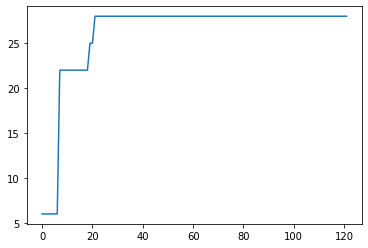

In [82]:
plt.plot(fitness_curve_rhc)

In [20]:
from mlrose_hiive.algorithms.decay import GeomDecay,ExpDecay

In [218]:
def avg_sa_runner(random_state):
    
    sa = SARunner(problem=problem,
              experiment_name=experiment_name,
              output_directory='4 peaks_sa',
              seed=0,
              iteration_list=range(100, 2000,100),
              max_attempts=100,
              temperature_list=[1, 10, 50, 100, 250, 500],
              schedule = GeomDecay(init_temp=10, decay=0.995)
              )
    df_run_stats, _ = sa.run()
    for i in random_state:
        for s in [ExpDecay(init_temp=10), GeomDecay()]:
            rhc = SARunner(problem=problem,
                  experiment_name=experiment_name,
                  output_directory='4_peaks_sa',
                  seed=i,
                  iteration_list=range(100,2000,100),
                  max_attempts=100,
                  temperature_list=[1, 10, 50, 100, 250, 500],
                 schedule = GeomDecay(init_temp=10, decay=0.995)
                 
                  )


            df_run_stats_local, _ = rhc.run()
            df_run_stats.append(df_run_stats_local)
        
    print (df_run_stats)
   # agg = df_run_stats.group_by(['Iteration', 'Restarts', 'max_iters']).mean()
    #print (agg)
    
    return df_run_stats

In [219]:
agg2= avg_sa_runner([1,42,100])
print (agg2)

Running sa
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[1.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[100], done:[False], time:[0.01], fitness:[0.0000]
	[0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1// 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[200], done:[False], time:[0.03], fitness:[1.0000]
	[0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0// 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1000], done:[False], time:[0.51], fitness:[21.0000]
	[1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0// 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1100], done:[False], time:[0.56], fitness:[22.0000]
	[0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0// 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1200], done:[False], time:[0.63], fitness:[23.0000]
	[0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1// 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1300], done:[False], 

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[4], iteration:[1800], done:[False], time:[1.37], fitness:[43.0000]
	[1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1900], done:[True], time:[1.47], fitness:[48.0000]
	[0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[1.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0]...

schedule:[10], max_iters:[1

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[700], done:[False], time:[0.61], fitness:[10.0000]
	[0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0// 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[800], done:[False], time:[0.71], fitness:[18.0000]
	[1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0// 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[900], done:[False], time:[0.83], fitness:[18.0000]
	[0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0// 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1000], done:[False], tim

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1600], done:[False], time:[1.84], fitness:[38.0000]
	[1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1700], done:[False], time:[1.98], fitness:[39.0000]
	[1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[4], iteration:[1800], done:[False], time:[2.12], fitness:[43.0000]
	[1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1900], done:[True], t

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[300], done:[False], time:[0.10], fitness:[5.0000]
	[0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0// 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[400], done:[False], time:[0.15], fitness:[2.0000]
	[0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1// 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[500], done:[False], time:[0.19], fitness:[3.0000]
	[1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0// 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[600], done:[False], time:[0

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1100], done:[False], time:[0.60], fitness:[39.0000]
	[1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[5], iteration:[1200], done:[False], time:[0.67], fitness:[44.0000]
	[1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1300], done:[False], time:[0.76], fitness:[44.0000]
	[0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[3], iteration:[1400], done:[False], 

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[100], done:[False], time:[0.01], fitness:[4.0000]
	[1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0// 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[200], done:[False], time:[0.10], fitness:[2.0000]
	[1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1// 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1]...

schedule:[10], max_iters:[1900

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[800], done:[False], time:[0.81], fitness:[16.0000]
	[1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0// 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[900], done:[False], time:[0.93], fitness:[36.0000]
	[0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1000], done:[False], time:[1.07], fitness:[38.0000]
	[0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1100], done:[False], ti

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[53], iteration:[1800], done:[False], time:[0.50], fitness:[63.0000]
	[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[98], iteration:[1900], done:[True], time:[0.55], fitness:[64.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0]...

schedule:[10], max_iters:

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[900], done:[False], time:[0.46], fitness:[36.0000]
	[0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1000], done:[False], time:[0.52], fitness:[38.0000]
	[0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1100], done:[False], time:[0.59], fitness:[39.0000]
	[1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[5], iteration:[1200], done:[False], t

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[98], iteration:[1900], done:[True], time:[1.70], fitness:[64.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[100], done:[False], time:[0.01], fitness:[4.0000]
	[1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0// 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0]...

schedule:[10], max_iters:[19

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[800], done:[False], time:[0.76], fitness:[16.0000]
	[1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0// 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[900], done:[False], time:[0.87], fitness:[36.0000]
	[0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1000], done:[False], time:[0.97], fitness:[38.0000]
	[0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1100], done:[False], ti

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1700], done:[False], time:[0.45], fitness:[42.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[6], iteration:[1800], done:[False], time:[0.49], fitness:[42.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[8], iteration:[1900], done:[True], time:[0.55], fitness:[49.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iter

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[800], done:[False], time:[0.41], fitness:[12.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0// 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[900], done:[False], time:[0.48], fitness:[18.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1// 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1000], done:[False], time:[0.54], fitness:[19.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1// 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1100], done:[False], ti

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1600], done:[False], time:[1.22], fitness:[37.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1700], done:[False], time:[1.31], fitness:[42.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[6], iteration:[1800], done:[False], time:[1.39], fitness:[42.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[8], iteration:[1900], done:[True], t

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[500], done:[False], time:[0.42], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0// 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[600], done:[False], time:[0.59], fitness:[10.0000]
	[1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0// 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[700], done:[False], time:[0.70], fitness:[10.0000]
	[1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0// 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[800], done:[False], time:

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1400], done:[False], time:[0.37], fitness:[33.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1// 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1500], done:[False], time:[0.40], fitness:[37.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1600], done:[False], time:[0.44], fitness:[37.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1700], done:[False], 

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[400], done:[False], time:[0.20], fitness:[3.0000]
	[1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1// 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[500], done:[False], time:[0.26], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0// 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[600], done:[False], time:[0.34], fitness:[10.0000]
	[1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0// 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[700], done:[False], time:[

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1300], done:[False], time:[1.07], fitness:[25.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1// 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1400], done:[False], time:[1.17], fitness:[33.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1// 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1500], done:[False], time:[1.26], fitness:[37.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1600], done:[False], 

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[200], done:[False], time:[0.13], fitness:[5.0000]
	[1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0// 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[300], done:[False], time:[0.23], fitness:[3.0000]
	[1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1// 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[400], done:[False], time:[0.34], fitness:[3.0000]
	[1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1// 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[500], done:[False], time:[0


schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1000], done:[False], time:[0.21], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0// 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1100], done:[False], time:[0.24], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0// 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1200], done:[False], time:[0.28], fitness:[19.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0// 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1300], done:[False],

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1// 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[100], done:[False], time:[0.01], fitness:[0.0000]
	[0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0// 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[200], done:[False], time:[0.06], fitness:[0.0000]
	[0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0// 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1]...

schedule:[10], max_iters:[1900

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1000], done:[False], time:[0.64], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0// 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1100], done:[False], time:[0.74], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0// 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1200], done:[False], time:[0.83], fitness:[19.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0// 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1300], done:[False], 

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[3], iteration:[1800], done:[False], time:[1.66], fitness:[43.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1900], done:[True], time:[1.78], fitness:[44.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1// 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0]...

schedule:[10], max_iters:[1

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[900], done:[False], time:[0.18], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1// 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1000], done:[False], time:[0.22], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0// 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1100], done:[False], time:[0.25], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0// 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1200], done:[False], t

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1900], done:[True], time:[0.85], fitness:[44.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1// 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[100], done:[False], time:[0.01], fitness:[0.0000]
	[0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0// 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1]...

schedule:[10], max_iters:[190

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[700], done:[False], time:[0.41], fitness:[11.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1// 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[800], done:[False], time:[0.49], fitness:[13.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1// 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[900], done:[False], time:[0.57], fitness:[16.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1// 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1000], done:[False], tim

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1500], done:[False], time:[1.39], fitness:[35.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0// 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1600], done:[False], time:[1.49], fitness:[39.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[4], iteration:[1700], done:[False], time:[1.60], fitness:[41.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1]...

schedule:[10], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[3], iteration:[1800], done:[False], 

In [216]:
agg.Iteration.value_counts()

1400    6
500     6
900     6
1800    6
400     6
1300    6
800     6
1700    6
300     6
1200    6
700     6
1600    6
200     6
1100    6
600     6
1500    6
100     6
1000    6
1900    6
0       6
Name: Iteration, dtype: int64

In [217]:
#agg = avg_sa_runner([1,42,100])
agg_new = agg.groupby(['Iteration', 'schedule_type', 'schedule_init_temp']).mean().reset_index()
agg_new.sort_values(by='Fitness', ascending=False)[:20]

,Iteration,schedule_type,schedule_init_temp,Fitness,Time,schedule_decay,schedule_min_temp,schedule_current_value,max_iters
19,1900,geometric,1,61.0,1.400722,0.995,0.001,0.993007,1900
18,1800,geometric,1,60.0,1.319804,0.995,0.001,0.993410,1900
17,1700,geometric,1,58.0,1.231764,0.995,0.001,0.993848,1900
16,1600,geometric,1,55.0,1.147306,0.995,0.001,0.994268,1900
15,1500,geometric,1,54.0,1.054587,0.995,0.001,0.994730,1900
14,1400,geometric,1,53.0,0.966162,0.995,0.001,0.995171,1900
13,1300,geometric,1,51.0,0.891393,0.995,0.001,0.995543,1900
11,1100,geometric,1,49.0,0.738318,0.995,0.001,0.996307,1900
12,1200,geometric,1,49.0,0.820724,0.995,0.001,0.995896,1900
10,1000,geometric,1,48.0,0.654524,0.995,0.001,0.996725,1900


In [220]:
#agg = avg_sa_runner([1,42,100])
agg_new2 = agg2.groupby(['Iteration', 'schedule_type', 'schedule_init_temp']).mean().reset_index()
agg_new2.sort_values(by='Fitness', ascending=False)[:20]

,Iteration,schedule_type,schedule_init_temp,Fitness,Time,schedule_decay,schedule_min_temp,schedule_current_value,max_iters
19,1900,geometric,10,48.0,1.532571,0.995,0.001,9.923509,1900
18,1800,geometric,10,43.0,1.433693,0.995,0.001,9.928424,1900
17,1700,geometric,10,39.0,1.340993,0.995,0.001,9.933035,1900
16,1600,geometric,10,38.0,1.240730,0.995,0.001,9.938025,1900
15,1500,geometric,10,34.0,1.149168,0.995,0.001,9.942584,1900
14,1400,geometric,10,34.0,1.058652,0.995,0.001,9.947094,1900
13,1300,geometric,10,26.0,0.981896,0.995,0.001,9.950919,1900
12,1200,geometric,10,23.0,0.890500,0.995,0.001,9.955476,1900
11,1100,geometric,10,22.0,0.799923,0.995,0.001,9.959995,1900
10,1000,geometric,10,21.0,0.711376,0.995,0.001,9.964415,1900


In [204]:
from mlrose_hiive.algorithms.decay import GeomDecay,ExpDecay
experiment_name = 'sa_queens'
#problem = problem_cust
sa = SARunner(problem=problem_64,
              experiment_name=experiment_name,
              output_directory='8queens_sa',
              seed=42,
              iteration_list=range(100,2000, 100),
              max_attempts=100,
              temperature_list=[1, 10, 50, 100, 250, 500],
              #decay_list = [0.999, 0.995, 0.99, 0.95],
              schedule = GeomDecay(init_temp=1, decay=0.995)
              )
# the two data frames will contain the results
df_run_stats, df_run_curves = sa.run() 

Running sa
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[7.0000]
	[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1// 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0]...

schedule:[1], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[100], done:[False], time:[0.01], fitness:[6.0000]
	[0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1// 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0]...

schedule:[1], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[200], done:[False], time:[0.02], fitness:[10.0000]
	[0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1// 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]...

schedule:[1], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_

schedule:[1], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[400], done:[False], time:[0.13], fitness:[19.0000]
	[0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0// 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[1], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[500], done:[False], time:[0.17], fitness:[23.0000]
	[1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0// 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[1], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[4], iteration:[600], done:[False], time:[0.21], fitness:[24.0000]
	[1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0// 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[1], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[700], done:[False], time:[0.

schedule:[1], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[400], done:[False], time:[0.19], fitness:[19.0000]
	[0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0// 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[1], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[500], done:[False], time:[0.27], fitness:[23.0000]
	[1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0// 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[1], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[4], iteration:[600], done:[False], time:[0.34], fitness:[24.0000]
	[1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0// 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

schedule:[1], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[700], done:[False], time:[0.

In [205]:
df_run_stats.sort_values(by='Fitness', ascending=False).to_csv('4peaks_sa_6.csv',index=False)

In [224]:
# Define alternative N-Queens fitness function for maximization problem
eval_curves = [] 
from mlrose_hiive.algorithms.decay import GeomDecay,ExpDecay
schedule = GeomDecay(init_temp=1, decay=0.995)



best_state, best_fitness, fitness_curve_sa_100, time_curve_sa = mlrose_hiive.simulated_annealing(problem_64, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 2000, curve=True,
                                                      init_state = None, random_state = 100)

eval_curves_sa = eval_curves

print (best_fitness)

64.0


In [241]:
a = np.zeros(2000)
a[:len(fitness_curve_sa_100)] = fitness_curve_sa_100
a[len(fitness_curve_sa_100):] = max(fitness_curve_sa_100)

b = np.zeros(2000)
b[:len(fitness_curve_sa_42)] = fitness_curve_sa_42 
b[len(fitness_curve_sa_42):] = max(fitness_curve_sa_42)



In [246]:
sa_mean = np.mean(np.array([a, fitness_curve_sa_0, b, fitness_curve_sa_1]),axis=0)

In [284]:
rhc_mean = np.mean(np.array([fitness_curve_rhc_0, fitness_curve_rhc_1, fitness_curve_rhc_42, fitness_curve_rhc_100]),axis=0)

ValueError: operands could not be broadcast together with shapes (909,) (1182,) 

In [ ]:
sa_mean

In [87]:
experiment_name = 'ga'
def avg_ga_runner(random_state):
    
    ga = GARunner(problem=problem,
                  experiment_name=experiment_name,
                  output_directory='8queens_ga',
                  seed=0,
                  iteration_list=[10,100],
                  max_attempts=100,
                  population_sizes=[150, 200, 300],
                  mutation_rates=[0.4, 0.5, 0.6])

    df_run_stats, df_run_curves = ga.run() 
    for i in random_state:
        ga = GARunner(problem=problem,
                  experiment_name=experiment_name,
                  output_directory='8queens_ga',
                  seed=0,
                  iteration_list=[10,100],
                  max_attempts=100,
                  population_sizes=[150, 200, 300],
                  mutation_rates=[0.4, 0.5, 0.6])
        
        
        df_run_stats_local, _ = ga.run()
        df_run_stats.append(df_run_stats_local)
        
    print (df_run_stats)
   # agg = df_run_stats.group_by(['Iteration', 'Restarts', 'max_iters']).mean()
    #print (agg)
    
    return df_run_stats

In [88]:
agg = avg_ga_runner([1, 42, 100])

Running ga
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[1.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0]...

pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[2], iteration:[10], done:[False], time:[0.16], fitness:[76.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1// 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[27], iteration:[100], done:[True], time:[2.02], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

***************
*** Run

pop_size:[300], mutation_prob:[0.6], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[1], iteration:[10], done:[False], time:[0.38], fitness:[76.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1// 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[300], mutation_prob:[0.6], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[31], iteration:[100], done:[True], time:[3.76], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

***************
*** Run END ***
***************
Run time: 25.774636699999974
Saving: [8queens_ga\ga\ga__ga__run_stats_df.csv]
Saving: [8queens_ga\ga\ga__ga__curves_df.csv]
Running ga
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[0], iteration:[0], done:[False], time:[0.00], fitne

pop_size:[300], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[1], iteration:[10], done:[False], time:[0.28], fitness:[76.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1// 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[300], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[7], iteration:[100], done:[True], time:[2.97], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[300], mutation_prob:[0.6], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[1.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 

pop_size:[300], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[4], iteration:[10], done:[False], time:[0.25], fitness:[22.0000]
	[0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1// 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[300], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[37], iteration:[100], done:[True], time:[3.20], fitness:[64.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[300], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[1.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 

pop_size:[200], mutation_prob:[0.6], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[1], iteration:[10], done:[False], time:[0.19], fitness:[77.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1// 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[200], mutation_prob:[0.6], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[13], iteration:[100], done:[True], time:[2.13], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[300], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[1.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1

In [43]:
agg

,Iteration,Fitness,Time,State,Population Size,Mutation Rate,max_iters
0,0,2.0,0.007575,"[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]",150,0.4,100
1,10,28.0,0.133504,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]",150,0.4,100
2,100,28.0,1.098262,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]",150,0.4,100
3,0,2.0,0.004793,"[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]",150,0.5,100
4,10,28.0,0.109264,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",150,0.5,100
5,100,28.0,1.134332,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",150,0.5,100
6,0,2.0,0.003766,"[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]",150,0.6,100
7,10,28.0,0.107226,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",150,0.6,100
8,100,28.0,1.100893,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",150,0.6,100
9,0,2.0,0.004926,"[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]",200,0.4,100


In [89]:

agg_new = agg.groupby(['Iteration', 'Population Size', 'Mutation Rate']).mean().reset_index()
agg_new.sort_values(by='Fitness', ascending=False)[:20]

,Iteration,Population Size,Mutation Rate,Fitness,Time,max_iters
26,100,300,0.6,117.0,3.755999,100
25,100,300,0.5,117.0,3.872277,100
23,100,200,0.6,117.0,2.722175,100
22,100,200,0.5,117.0,2.763303,100
21,100,200,0.4,117.0,2.803467,100
20,100,150,0.6,117.0,2.111889,100
19,100,150,0.5,117.0,2.033670,100
18,100,150,0.4,117.0,2.023450,100
10,10,150,0.5,79.0,0.157859,100
12,10,200,0.4,79.0,0.278106,100


In [194]:
ga = GARunner(problem=problem_64,
                  experiment_name='experiment_name',
                  output_directory='8queens_ga.csv',
                  seed=42,
                  iteration_list=range(100, 800, 100),
                  max_attempts=1000,
                  population_sizes=[50, 100, 150, 200, 300, 500],
                  mutation_rates=[0.1, 0.2, 0.4, 0.5, 0.6, 0.8])

df_run_stats_new, df_run_curves = ga.run() 

Running ga
*****************
*** Run START ***
*****************
pop_size:[50], mutation_prob:[0.1], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[7.0000]
	[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1// 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0]...

pop_size:[50], mutation_prob:[0.1], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[90], iteration:[100], done:[False], time:[0.50], fitness:[17.0000]
	[1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0// 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[50], mutation_prob:[0.1], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[33], iteration:[200], done:[False], time:[1.01], fitness:[23.0000]
	[1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0// 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

pop_size:[50], mutation_prob:[0.5], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[12], iteration:[100], done:[False], time:[0.47], fitness:[56.0000]
	[1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[50], mutation_prob:[0.5], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[77], iteration:[200], done:[False], time:[1.11], fitness:[64.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[50], mutation_prob:[0.5], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[177], iteration:[300], done:[False], time:[1.76], fitness:[64.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[50], mutation_prob:[0.5], max_iters

pop_size:[100], mutation_prob:[0.1], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[1], iteration:[200], done:[False], time:[1.70], fitness:[44.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1]...

pop_size:[100], mutation_prob:[0.1], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[26], iteration:[300], done:[False], time:[2.65], fitness:[64.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...

pop_size:[100], mutation_prob:[0.1], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[126], iteration:[400], done:[False], time:[3.70], fitness:[64.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...

pop_size:[100], mutation_prob:[0.1], max_it

pop_size:[100], mutation_prob:[0.5], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[163], iteration:[300], done:[False], time:[2.89], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[100], mutation_prob:[0.5], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[263], iteration:[400], done:[False], time:[3.90], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[100], mutation_prob:[0.5], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[363], iteration:[500], done:[False], time:[4.94], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[100], mutation_prob:[0.5], 

pop_size:[150], mutation_prob:[0.1], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[274], iteration:[400], done:[False], time:[6.76], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[150], mutation_prob:[0.1], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[374], iteration:[500], done:[False], time:[8.34], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[150], mutation_prob:[0.1], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[474], iteration:[600], done:[False], time:[10.03], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[150], mutation_prob:[0.1],

pop_size:[150], mutation_prob:[0.5], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[410], iteration:[500], done:[False], time:[7.68], fitness:[64.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...

pop_size:[150], mutation_prob:[0.5], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[510], iteration:[600], done:[False], time:[9.25], fitness:[64.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...

pop_size:[150], mutation_prob:[0.5], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[610], iteration:[700], done:[True], time:[10.78], fitness:[64.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...

***************
*** Run END ***
********

pop_size:[200], mutation_prob:[0.1], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[500], iteration:[600], done:[False], time:[11.22], fitness:[64.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...

pop_size:[200], mutation_prob:[0.1], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[600], iteration:[700], done:[True], time:[13.15], fitness:[64.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[200], mutation_prob:[0.2], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[7.0000]
	[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1// 0

pop_size:[200], mutation_prob:[0.5], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[632], iteration:[700], done:[True], time:[15.08], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[200], mutation_prob:[0.6], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[7.0000]
	[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1// 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0]...

pop_size:[200], mutation_prob:[0.6], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[19], iteration:[100], done:[False], time:[1.91], fitness:[64.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 

pop_size:[300], mutation_prob:[0.2], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[1], iteration:[100], done:[False], time:[2.70], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[300], mutation_prob:[0.2], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[101], iteration:[200], done:[False], time:[5.85], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[300], mutation_prob:[0.2], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[201], iteration:[300], done:[False], time:[8.94], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[300], mutation_prob:[0.2], ma

pop_size:[300], mutation_prob:[0.6], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[141], iteration:[200], done:[False], time:[7.24], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[300], mutation_prob:[0.6], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[241], iteration:[300], done:[False], time:[10.85], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[300], mutation_prob:[0.6], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[341], iteration:[400], done:[False], time:[14.42], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[300], mutation_prob:[0.6]

pop_size:[500], mutation_prob:[0.2], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[203], iteration:[300], done:[False], time:[16.54], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[500], mutation_prob:[0.2], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[303], iteration:[400], done:[False], time:[22.32], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[500], mutation_prob:[0.2], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[403], iteration:[500], done:[False], time:[27.70], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[500], mutation_prob:[0.2

pop_size:[500], mutation_prob:[0.6], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[340], iteration:[400], done:[False], time:[27.13], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[500], mutation_prob:[0.6], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[440], iteration:[500], done:[False], time:[34.02], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[500], mutation_prob:[0.6], max_iters:[700]
runner_name:[ga], experiment_name:[experiment_name], attempt:[540], iteration:[600], done:[False], time:[40.92], fitness:[117.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[500], mutation_prob:[0.6

In [195]:
df_run_stats_new.sort_values(by='Fitness', ascending=False).to_csv('4peaks_ga2.csv',index=False)

In [276]:

eval_curves = [] 
best_state, best_fitness_ga, fitness_curve_ga_42_2, time_curve_ga = mlrose_hiive.genetic_alg(problem, pop_size=300, pop_breed_percent=0.6, elite_dreg_ratio=0.99,
                minimum_elites=0, minimum_dregs=0, mutation_prob=0.6,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

eval_curves_ga = eval_curves

print (best_fitness_ga)

117.0


In [258]:
experiment_name = 'mmc'
def avg_mmc_runner(random_state):
    
    mmc = MIMICRunner(problem_64,
                      experiment_name=experiment_name,
                      output_directory='4peaks_mimic',
                      seed=0,
                      iteration_list=range(100, 800, 50),
                      max_attempts=100,
                      keep_percent_list=[0.05, 0.1, 0.25, 0.5, 0.75],
                     population_sizes = [500, 1000, 1500, 2000, 2500, 3000],
                 use_fast_mimic = True)

    df_run_stats, df_run_curves = mmc.run() 
    for i in random_state:
        mmc = MIMICRunner(problem_64,
                      experiment_name=experiment_name,
                      output_directory='4peaks_mimic',
                      seed=i,
                      iteration_list=range(100, 800, 50),
                      max_attempts=100,
                      keep_percent_list=[0.05, 0.1, 0.25, 0.5, 0.75],
                     population_sizes = [500, 1000, 1500, 2000, 2500, 3000],
                 use_fast_mimic = True)
        
        
        df_run_stats_local, _ = mmc.run()
        df_run_stats.append(df_run_stats_local)
        
    print (df_run_stats)
   # agg = df_run_stats.group_by(['Iteration', 'Restarts', 'max_iters']).mean()
    #print (agg)
    
    return df_run_stats

In [259]:
agg_mimic_new = avg_mmc_runner([1, 42, 100])

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[500], keep_pct:[0.05], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[1.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.05], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[96], iteration:[100], done:[False], time:[9.63], fitness:[81.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.// 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.05], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[105], done:[True], time:[10.09], fitness:[81.0000]
	[1. 1. 1. 1. 1. 1.

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[120], done:[True], time:[16.27], fitness:[107.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[1.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[89], iteration:[100], done:[False], time:[12.65],

use_fast_mimic:[True], pop_size:[1500], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[90], iteration:[100], done:[False], time:[17.94], fitness:[19.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.// 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.// 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[1500], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[111], done:[True], time:[19.99], fitness:[19.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.// 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.// 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[1500], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_n

use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[36], iteration:[200], done:[False], time:[58.96], fitness:[23.0000]
	[0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.// 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[86], iteration:[250], done:[False], time:[74.91], fitness:[23.0000]
	[0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.// 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[265], done:[True], time:[79.43], fitness:[23.0000]
	[0. 1. 1. 1. 1

use_fast_mimic:[True], pop_size:[2500], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[76], iteration:[150], done:[False], time:[55.99], fitness:[21.0000]
	[0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.// 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[2500], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[175], done:[True], time:[65.38], fitness:[21.0000]
	[0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.// 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[3000], keep_pct:[0.05], max_iters:[750]
runner_name:[mimic], experiment

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[90], iteration:[100], done:[False], time:[6.78], fitness:[96.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.// 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[111], done:[True], time:[7.63], fitness:[96.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.// 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[500], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[82], iteration:[100], done:[False], time:[12.63], fitness:[21.0000]
	[0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.// 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[119], done:[True], time:[15.22], fitness:[21.0000]
	[0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.// 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_n

use_fast_mimic:[True], pop_size:[1500], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[263], done:[True], time:[62.40], fitness:[23.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.// 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.// 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[1500], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.04], fitness:[2.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0]...

use_fast_mimic:[True], pop_size:[1500], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[45], iteration:[100], done:[False], time:[22.55], 

use_fast_mimic:[True], pop_size:[2500], keep_pct:[0.05], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[90], iteration:[100], done:[False], time:[40.76], fitness:[111.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[2500], keep_pct:[0.05], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[111], done:[True], time:[45.86], fitness:[111.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[2500], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experimen

use_fast_mimic:[True], pop_size:[2500], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[220], done:[True], time:[76.76], fitness:[21.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.// 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.// 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[3000], keep_pct:[0.05], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.08], fitness:[2.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0]...

use_fast_mimic:[True], pop_size:[3000], keep_pct:[0.05], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[89], iteration:[100], done:[False], time:[46.46],

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.05], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[90], iteration:[100], done:[False], time:[7.93], fitness:[90.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1.// 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.05], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[111], done:[True], time:[8.80], fitness:[90.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1.// 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[500], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[46], iteration:[100], done:[False], time:[12.60], fitness:[102.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.// 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[96], iteration:[150], done:[False], time:[20.85], fitness:[102.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.// 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[155], done:[True], time:[21.60], fitness:[102.0000]
	[1. 1. 1

use_fast_mimic:[True], pop_size:[1500], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[14], iteration:[200], done:[False], time:[40.21], fitness:[102.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1.// 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[1500], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[64], iteration:[250], done:[False], time:[51.57], fitness:[102.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1.// 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[1500], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[287], done:[True], time:[59.92], fitness:[102.0000]
	[1. 1. 1

use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[65], iteration:[100], done:[False], time:[26.55], fitness:[19.0000]
	[1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.// 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[136], done:[True], time:[38.17], fitness:[19.0000]
	[1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.// 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[2500], keep_pct:[0.05], max_iters:[750]
runner_name:[mimic], experiment

use_fast_mimic:[True], pop_size:[3000], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[82], iteration:[100], done:[False], time:[44.91], fitness:[113.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[3000], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[119], done:[True], time:[55.92], fitness:[113.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[3000], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[138], done:[True], time:[10.06], fitness:[106.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[500], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[2.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1// 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[78], iteration:[100], done:[False], time:[7.36], fitn

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[15], iteration:[150], done:[False], time:[19.25], fitness:[20.0000]
	[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.// 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[65], iteration:[200], done:[False], time:[25.65], fitness:[20.0000]
	[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.// 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[236], done:[True], time:[30.27], fitness:[20.0000]
	[1. 0. 0. 1

use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[81], iteration:[100], done:[False], time:[23.07], fitness:[62.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]...

use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[120], done:[True], time:[28.49], fitness:[62.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_n

use_fast_mimic:[True], pop_size:[2500], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[104], done:[True], time:[29.37], fitness:[76.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.// 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.// 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[2500], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.05], fitness:[2.0000]
	[0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1// 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0]...

use_fast_mimic:[True], pop_size:[2500], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[50], iteration:[100], done:[False], time:[30.02], f

use_fast_mimic:[True], pop_size:[3000], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[80], iteration:[100], done:[False], time:[36.37], fitness:[22.0000]
	[0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.// 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[3000], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[101], iteration:[121], done:[True], time:[45.90], fitness:[22.0000]
	[0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.// 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

***************
*** Run END ***
***************
Run time: 851.6621194999898
Saving: [4peaks_mimic\mmc\mimic__mmc__run_stats_df.csv]
Saving: [4peaks_mimic\mmc\mimic__mmc__curves_df.csv]
     Iteration  Fitne

In [261]:
agg_mimic_new.to_csv('fourpeaks_mimic_finalfinal.csv', index=False)

In [186]:
mmc = MIMICRunner(problem_64,
                      experiment_name=experiment_name,
                      output_directory='4peaks_mimic2',
                      seed=42,
                      iteration_list=range(100, 800, 50),
                      max_attempts=1000,
                      keep_percent_list=[0.1, 0.25, 0.5, 0.75, 0.85],
                     population_sizes = [500, 1000, 1500, 2000, 25000, 3000],
                 use_fast_mimic = True)


df_run_stats, df_run_curves = mmc.run() 

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[100], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[7.0000]
	[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1// 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[99], iteration:[100], done:[False], time:[2.27], fitness:[10.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.// 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.// 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[149], iteration:[150], done:[False], time:[3.43], fitness:[10.0000]
	[1. 1. 1. 1. 1. 1. 1.

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[342], iteration:[350], done:[False], time:[8.41], fitness:[16.0000]
	[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[392], iteration:[400], done:[False], time:[9.58], fitness:[16.0000]
	[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[442], iteration:[450], done:[False], time:[10.73], fitness:[16.0000]
	[1. 1. 1. 1. 

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[649], iteration:[650], done:[False], time:[15.07], fitness:[12.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.// 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.// 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[699], iteration:[700], done:[False], time:[16.30], fitness:[12.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.// 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.// 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[749], iteration:[750], done:[True], time:[17.44], fitness:[12.0000]
	[1. 1. 1. 1. 1.

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.85], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[186], iteration:[200], done:[False], time:[4.76], fitness:[14.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.// 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.// 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.85], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[236], iteration:[250], done:[False], time:[5.88], fitness:[14.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.// 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.// 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.85], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[286], iteration:[300], done:[False], time:[7.00], fitness:[14.0000]
	[1. 1. 1. 1. 1

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[496], iteration:[500], done:[False], time:[17.22], fitness:[78.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.// 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0.// 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[546], iteration:[550], done:[False], time:[18.97], fitness:[78.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.// 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0.// 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[596], iteration:[600], done:[False], time:[20.69], fitness:[78.0000]
	[1. 1. 1. 1. 1

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[88], iteration:[100], done:[False], time:[3.53], fitness:[15.0000]
	[1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.// 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.// 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[138], iteration:[150], done:[False], time:[5.28], fitness:[15.0000]
	[1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.// 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.// 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[188], iteration:[200], done:[False], time:[6.99], fitness:[15.0000]
	[1. 0. 0. 0. 1. 1.

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[398], iteration:[400], done:[False], time:[13.61], fitness:[14.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0.// 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.// 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[448], iteration:[450], done:[False], time:[15.26], fitness:[14.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0.// 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.// 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[498], iteration:[500], done:[False], time:[16.95], fitness:[14.0000]
	[1. 1. 1. 1

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.85], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[677], iteration:[700], done:[False], time:[24.27], fitness:[16.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.// 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.// 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.85], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[727], iteration:[750], done:[True], time:[25.97], fitness:[16.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.// 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.// 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[500], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_na

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[229], iteration:[250], done:[False], time:[17.90], fitness:[34.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.// 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1.]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[279], iteration:[300], done:[False], time:[21.62], fitness:[34.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.// 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1.]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[329], iteration:[350], done:[False], time:[25.32], fitness:[34.0000]
	[1. 1. 1. 1

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[498], iteration:[550], done:[False], time:[39.61], fitness:[85.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.// 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.// 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[548], iteration:[600], done:[False], time:[43.18], fitness:[85.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.// 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.// 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[598], iteration:[650], done:[False], time:[46.90], fitness:[85.0000]
	[1. 1. 1. 1. 1

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.85], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[40], iteration:[100], done:[False], time:[7.21], fitness:[19.0000]
	[1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.// 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.85], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[90], iteration:[150], done:[False], time:[10.94], fitness:[19.0000]
	[1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.// 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.85], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[140], iteration:[200], done:[False], time:[14.66], fitness:[19.0000]
	[1. 1. 1. 0. 0

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[385], iteration:[400], done:[False], time:[56.79], fitness:[106.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[435], iteration:[450], done:[False], time:[64.35], fitness:[106.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.1], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[485], iteration:[500], done:[False], time:[71.99], fitness:[106.0000]
	[1. 1. 1

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[646], iteration:[700], done:[False], time:[102.49], fitness:[102.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.// 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.25], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[696], iteration:[750], done:[True], time:[109.84], fitness:[102.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.// 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.5], max_iters:[750]
runner_name:[mimic], experi

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[99], iteration:[250], done:[False], time:[36.44], fitness:[20.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.// 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.// 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[149], iteration:[300], done:[False], time:[43.49], fitness:[20.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.// 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.// 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.75], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[199], iteration:[350], done:[False], time:[50.60], fitness:[20.0000]
	[1. 1. 1.

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.85], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[451], iteration:[550], done:[False], time:[73.78], fitness:[14.0000]
	[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1.// 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.// 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.85], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[501], iteration:[600], done:[False], time:[80.73], fitness:[14.0000]
	[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1.// 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.// 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.85], max_iters:[750]
runner_name:[mimic], experiment_name:[mmc], attempt:[551], iteration:[650], done:[False], time:[87.32], fitness:[14.0000]
	[0. 0. 1

In [188]:
df_run_stats

,Iteration,Fitness,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,7.0,0.005099,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",True,100,0.10,750
1,100,10.0,2.269804,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",True,100,0.10,750
2,150,10.0,3.425159,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",True,100,0.10,750
3,200,10.0,4.573630,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",True,100,0.10,750
4,250,10.0,5.732035,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",True,100,0.10,750
...,...,...,...,...,...,...,...,...
295,550,14.0,73.779861,"[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",True,1000,0.85,750
296,600,14.0,80.728209,"[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",True,1000,0.85,750
297,650,14.0,87.323732,"[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",True,1000,0.85,750
298,700,14.0,93.835675,"[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",True,1000,0.85,750


In [255]:
df_run_stats.sort_values(by='Fitness', ascending=False).to_csv('4peaks_64_mimic_3000.csv', index=False)

In [85]:
agg_new = agg.groupby(['Iteration', 'Population Size', 'Keep Percent']).mean().reset_index()
agg_new.sort_values(by='Fitness', ascending=False)[:20]

,Iteration,Population Size,Keep Percent,Fitness,Time,use_fast_mimic,max_iters
25,100,500,0.50,85.0,7.410654,True,100
21,100,200,0.25,82.0,3.704252,True,100
12,10,200,0.25,82.0,0.246619,True,100
24,100,500,0.25,34.0,7.400224,True,100
15,10,500,0.25,20.0,0.452323,True,100
26,100,500,0.75,16.0,7.516707,True,100
18,100,100,0.25,16.0,2.357685,True,100
17,10,500,0.75,16.0,0.775351,True,100
9,10,100,0.25,16.0,0.234420,True,100
16,10,500,0.50,16.0,0.648998,True,100


In [175]:
mmc = MIMICRunner(problem=problem,
                      experiment_name=experiment_name,
                      output_directory='8queens_mimic',
                      seed=42,
                      iteration_list=range(10, 500, 50),
                      max_attempts=100,
                      keep_percent_list=[0.25, 0.5, 0.75],
                     population_sizes = [100,200,500],
                 use_fast_mimic = True)

In [176]:
df_run_stats, df_run_curves = mmc.run() 

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[460]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[7.0000]
	[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1// 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[460]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[2], iteration:[10], done:[False], time:[0.26], fitness:[16.0000]
	[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[460]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[52], iteration:[60], done:[False], time:[1.71], fitness:[16.0000]
	[1. 

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.75], max_iters:[460]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[8], iteration:[10], done:[False], time:[0.39], fitness:[14.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0.// 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.// 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.75], max_iters:[460]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[58], iteration:[60], done:[False], time:[2.54], fitness:[14.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0.// 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.// 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.75], max_iters:[460]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[101], iteration:[103], done:[True], time:[4.23], fitness:[14.0000]
	[1

In [177]:
df_run_stats

,Iteration,Fitness,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,7.0,0.005987,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",True,100,0.25,460
1,10,16.0,0.262626,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",True,100,0.25,460
2,60,16.0,1.712261,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",True,100,0.25,460
3,110,16.0,3.064818,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",True,100,0.25,460
4,160,16.0,3.064818,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",True,100,0.25,460
...,...,...,...,...,...,...,...,...
94,260,16.0,8.394185,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",True,500,0.75,460
95,310,16.0,8.394185,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",True,500,0.75,460
96,360,16.0,8.394185,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",True,500,0.75,460
97,410,16.0,8.394185,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",True,500,0.75,460


In [35]:
df_run_stats

,Iteration,Fitness,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,17.0,0.008792,"[6, 3, 4, 6, 2, 7, 4, 4]",True,100,0.25,100
1,10,28.0,0.151844,"[5.0, 1.0, 6.0, 0.0, 2.0, 4.0, 7.0, 3.0]",True,100,0.25,100
2,100,28.0,1.216777,"[5.0, 1.0, 6.0, 0.0, 2.0, 4.0, 7.0, 3.0]",True,100,0.25,100
3,0,17.0,0.006095,"[6, 3, 4, 6, 2, 7, 4, 4]",True,100,0.50,100
4,10,27.0,0.132243,"[3.0, 1.0, 4.0, 7.0, 0.0, 2.0, 5.0, 5.0]",True,100,0.50,100
5,100,27.0,1.267546,"[3.0, 1.0, 4.0, 7.0, 0.0, 2.0, 5.0, 5.0]",True,100,0.50,100
6,0,17.0,0.007039,"[6, 3, 4, 6, 2, 7, 4, 4]",True,100,0.75,100
7,10,26.0,0.135781,"[0.0, 7.0, 4.0, 6.0, 3.0, 1.0, 7.0, 5.0]",True,100,0.75,100
8,100,26.0,1.306249,"[0.0, 7.0, 4.0, 6.0, 3.0, 1.0, 7.0, 5.0]",True,100,0.75,100
9,0,17.0,0.010025,"[6, 3, 4, 6, 2, 7, 4, 4]",True,200,0.25,100


In [283]:
eval_curves = [] 
best_state, best_fitness_mimic, fitness_curve_mimic_0_f, time_curve_mimic = mlrose_hiive.mimic(problem,  pop_size=2500, keep_pct=0.05,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=0)

eval_curves_mimic = eval_curves
print (best_fitness_mimic)

75.0


Text(0, 0.5, 'Time')

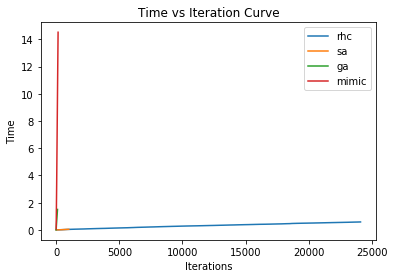

In [102]:
plt.plot(time_curve_rhc, label = 'rhc')
plt.plot(time_curve_sa, label = 'sa')
plt.plot(time_curve_ga, label = 'ga')
plt.plot(time_curve_mimic, label='mimic')
plt.legend()
plt.title("Time vs Iteration Curve")
plt.xlabel("Iterations")
plt.ylabel("Time")

Text(0, 0.5, 'Time')

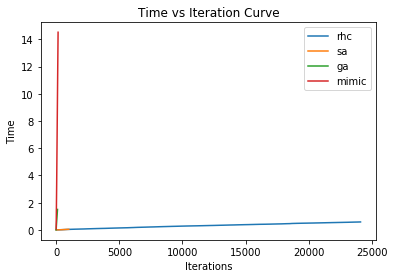

In [131]:
plt.plot(time_curve_rhc, label = 'rhc')
plt.plot(time_curve_sa, label = 'sa')
plt.plot(time_curve_ga, label = 'ga')
plt.plot(time_curve_mimic, label='mimic')
plt.legend()
plt.title("Time vs Iteration Curve")
plt.xlabel("Iterations")
plt.ylabel("Time")

Text(0, 0.5, 'Fitness')

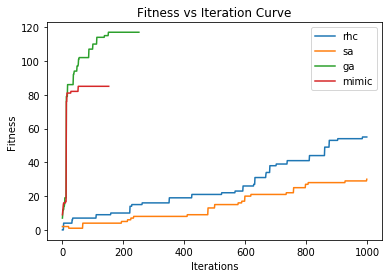

In [101]:
plt.plot(fitness_curve_rhc, label = 'rhc')
plt.plot(fitness_curve_sa, label = 'sa')
plt.plot(fitness_curve_ga, label = 'ga')
plt.plot(fitness_curve_mimic, label='mimic')
plt.legend()
plt.title("Fitness vs Iteration Curve")
plt.xlabel("Iterations")
plt.ylabel("Fitness")


Text(0, 0.5, 'Fitness')

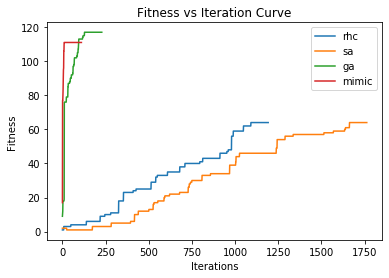

In [320]:
plt.plot(fitness_curve_rhc, label = 'rhc')
plt.plot(fitness_curve_sa, label = 'sa')
plt.plot(fitness_curve_ga, label = 'ga')
plt.plot(fitness_curve_mimic_1_f, label='mimic')
plt.legend()
plt.title("Fitness vs Iteration Curve")
plt.xlabel("Iterations")
plt.ylabel("Fitness")


Text(0, 0.5, 'Fitness')

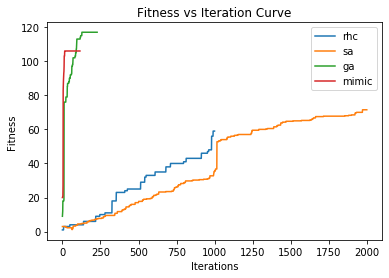

In [264]:
plt.plot(fitness_curve_rhc, label = 'rhc')
plt.plot(sa_mean, label = 'sa')
plt.plot(fitness_curve_ga, label = 'ga')
plt.plot(fitness_curve_mimic, label='mimic')
plt.legend()
plt.
plt.title("Fitness vs Iteration Curve")
plt.xlabel("Iterations")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

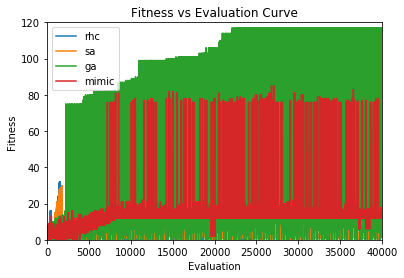

In [145]:
plt.plot(eval_curves_rhc, label = 'rhc')
plt.plot(eval_curves_sa, label = 'sa')
plt.plot(eval_curves_ga, label = 'ga')
plt.plot(eval_curves_mimic, label = 'mimic')
plt.legend()
plt.axis([0, 40000, 0 , 120])
plt.title("Fitness vs Evaluation Curve")
plt.xlabel("Evaluation")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

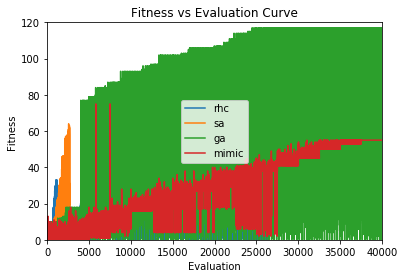

In [285]:
plt.plot(eval_curves_rhc, label = 'rhc')
plt.plot(eval_curves_sa, label = 'sa')
plt.plot(eval_curves_ga, label = 'ga')
plt.plot(eval_curves_mimic, label = 'mimic')
plt.legend()
plt.axis([0, 40000, 0 , 120])
plt.title("Fitness vs Evaluation Curve")
plt.xlabel("Evaluation")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

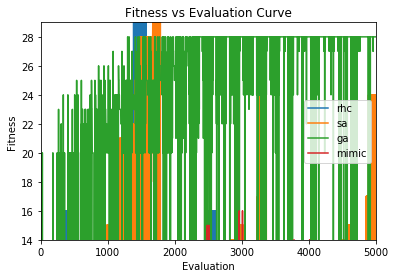

In [133]:
plt.plot(eval_curves_rhc, label = 'rhc')
plt.plot(eval_curves_sa, label = 'sa')
plt.plot(eval_curves_ga, label = 'ga')
plt.plot(eval_curves_mimic, label = 'mimic')
plt.legend()
plt.axis([0, 5000, 14, 29])
plt.title("Fitness vs Evaluation Curve")
plt.xlabel("Evaluation")
plt.ylabel("Fitness")

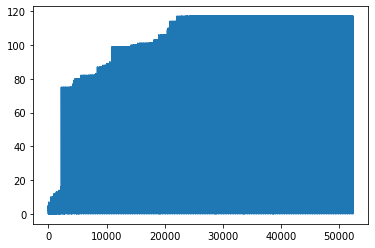

In [146]:
plt.plot(eval_curves_ga, label = 'rhc')

In [56]:
### Input 

In [178]:
problem_64

In [64]:
fitness_cust = mlrose_hiive.CustomFitness(eval_peak)
# Define optimization problem object
problem_16 = mlrose_hiive.DiscreteOpt(length = 16, fitness_fn = fitness_cust, maximize = True, max_val = 2)

fitness_cust = mlrose_hiive.CustomFitness(eval_peak)
# Define optimization problem object
problem_24 = mlrose_hiive.DiscreteOpt(length = 24, fitness_fn = fitness_cust, maximize = True, max_val = 2)

fitness_cust = mlrose_hiive.CustomFitness(eval_peak)
# Define optimization problem object
problem_32 = mlrose_hiive.DiscreteOpt(length = 32, fitness_fn = fitness_cust, maximize = True, max_val = 2)

fitness_cust = mlrose_hiive.CustomFitness(eval_peak)
# Define optimization problem object
problem_40 = mlrose_hiive.DiscreteOpt(length = 40, fitness_fn = fitness_cust, maximize = True, max_val = 2)

fitness_cust = mlrose_hiive.CustomFitness(eval_peak)
# Define optimization problem object
problem_48 = mlrose_hiive.DiscreteOpt(length =48, fitness_fn = fitness_cust, maximize = True, max_val = 2)

fitness_cust = mlrose_hiive.CustomFitness(eval_peak)
# Define optimization problem object
problem_64 = mlrose_hiive.DiscreteOpt(length =64, fitness_fn = fitness_cust, maximize = True, max_val = 2)

In [315]:
best_fitness_rhc_list_new2 = []
max_time_rhc_list_new2 = []
max_eval_rhc_list_new2 = []
for p in [problem_16, problem_24, problem_32, problem_40, problem_48, problem_64]:
    eval_curves = [] 
    #best_state, best_fitness_rhc_1, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
    #                                                      max_attempts = 100, max_iters = 1000, curve=True,
    #                                                      init_state = None, random_state = 1)
    best_state, best_fitness_rhc, fitness_curve_rhc, time= mlrose_hiive.random_hill_climb(p, restarts = 100, 
                                                          max_attempts = 100, max_iters = 2000, curve=True,
                                                          init_state = None, random_state = 42)
    #best_state, best_fitness_rhc_100, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
    #                                                      max_attempts = 100, max_iters = 1000, curve=True,
    #                                                      init_state = None, random_state = 100)

    best_fitness_rhc_list_new2.append(best_fitness_rhc)
    max_time_rhc_list_new2.append(max(time))
    max_eval_rhc_list_new2.append(len(eval_curves))

In [316]:
best_fitness_rhc_list_new2

[28.0, 43.0, 58.0, 73.0, 62.0, 64.0]

In [309]:
best_fitness_rhc_list_new2

[]

In [149]:
best_fitness_ga_list_new = []
best_fitness_ga_list_new = []
max_time_ga_list = []
max_eval_ga_list = []
for p in [problem_16, problem_24, problem_32, problem_40, problem_48, problem_64]:
    eval_curves = [] 
    best_state, best_fitness_ga, fitness_curve_ga, time= mlrose_hiive.genetic_alg(p, pop_size=300, pop_breed_percent=0.6, elite_dreg_ratio=0.99,
                    minimum_elites=0, minimum_dregs=0, mutation_prob=0.1,
                    max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

    #eval_curves_ga_list = eval_curves
    best_fitness_ga_list_new.append(best_fitness_ga)
    max_time_ga_list.append(max(time))
    max_eval_ga_list.append(len(eval_curves))
print (best_fitness_ga_list)


[28.0, 43.0, 58.0, 73.0, 87.0, 117.0]


In [119]:
best_fitness_ga_list_new

[28.0, 43.0, 58.0, 73.0, 87.0, 117.0]

In [305]:
# Define alternative N-Queens fitness function for maximization problem

best_fitness_sa_list_new2 = []
max_time_sa_list_new2 = []
max_eval_sa_list_new2 = []
for p in [problem_16, problem_24, problem_32, problem_40, problem_48, problem_64]:
    eval_curves = [] 


    # Initialize custom fitness function object



    best_state, best_fitness, fitness_curve_sa, time = mlrose_hiive.simulated_annealing(p, schedule = schedule, 
                                                          max_attempts = 100, max_iters = 2000, curve=True,
                                                          init_state = None, random_state = 100)

    best_fitness_sa_list_new2.append(best_fitness)
    max_time_sa_list_new2.append(max(time))
    max_eval_sa_list_new2.append(len(eval_curves))

print (best_fitness_sa_list_new2)

[16.0, 43.0, 58.0, 40.0, 48.0, 64.0]


In [294]:
best_fitness_mimic_list_new2 = []
max_time_mimic_list_new2 = []
max_eval_mimic_list_new2 = []
for p in[problem_16, problem_24, problem_32, problem_40, problem_48, problem_64]:
    eval_curves = [] 

    best_state, best_fitness_mimic, fitness_curve_mimic, time= mlrose_hiive.mimic(p,  pop_size=2000, keep_pct=0.05,
                    max_attempts=100, max_iters=np.inf, curve=True, random_state=100)

    best_fitness_mimic_list_new2.append(best_fitness_mimic)
    max_time_mimic_list_new2.append(max(time))
    max_eval_mimic_list_new2.append(len(eval_curves))

print (best_fitness_mimic_list_new)

[28.0, 42.0, 44.0, 52.0, 64.0, 79.0]


In [296]:
best_fitness_mimic_list_new2

[28.0, 43.0, 58.0, 73.0, 85.0, 102.0]

In [111]:
eval_curves = [] 

best_state, best_fitness_mimic, fitness_curve_mimic, _= mlrose_hiive.mimic(problem_64,  pop_size=500, keep_pct=0.5,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

   

In [129]:
best_fitness_ga_list

[28.0, 43.0, 58.0, 73.0, 87.0, 117.0]

In [127]:
mean_mimic = np.mean(np.array([best_fitness_mimic_list, best_fitness_mimic_list_new]), axis=0)
mean_rhc = np.mean(np.array([best_fitness_rhc_list, best_fitness_rhc_list_new]), axis=0)

Text(0, 0.5, 'Time')

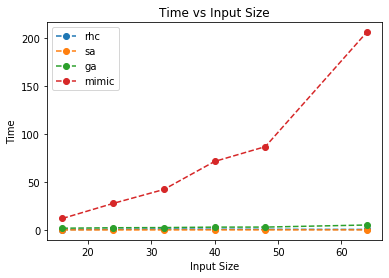

In [160]:
x = [16, 24, 32,40,48,64]
plt.plot(x, max_time_rhc_list,ls='--', marker='o',label = 'rhc')
plt.plot(x, max_time_sa_list, ls='--', marker='o',label = 'sa')
plt.plot(x, max_time_ga_list,ls='--', marker='o', label = 'ga')
plt.plot(x, max_time_mimic_list, ls='--', marker='o',label='mimic')
plt.legend()
plt.plot()

plt.title("Time vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Time")

Text(0, 0.5, 'Evaluation Functions')

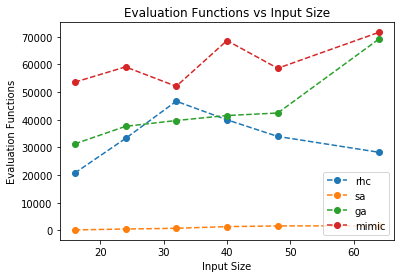

In [158]:
x = [16, 24, 32,40,48,64]
plt.plot(x, max_eval_rhc_list,ls='--', marker='o',label = 'rhc')
plt.plot(x, max_eval_sa_list, ls='--', marker='o',label = 'sa')
plt.plot(x, max_eval_ga_list,ls='--', marker='o', label = 'ga')
plt.plot(x, max_eval_mimic_list, ls='--', marker='o',label='mimic')
plt.legend()
plt.plot()

plt.title("Evaluation Functions vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Evaluation Functions")

Text(0, 0.5, 'Fitness')

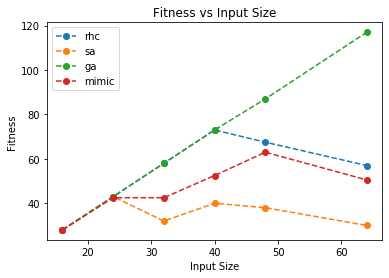

In [130]:
x = [16, 24, 32,40,48,64]
plt.plot(x, max_time_mimic_list,ls='--', marker='o',label = 'rhc')
plt.plot(x, max_time_mimic_list, ls='--', marker='o',label = 'sa')
plt.plot(x, max_time_mimc_list,ls='--', marker='o', label = 'ga')
plt.plot(x, max_time_mimic, ls='--', marker='o',label='mimic')
plt.legend()
plt.plot()

plt.title("Fitness vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Fitness")

In [ ]:
x = [16, 24, 32,40,48,64]
plt.plot(x, mean_rhc,ls='--', marker='o',label = 'rhc')
plt.plot(x, best_fitness_sa_list, ls='--', marker='o',label = 'sa')
plt.plot(x, best_fitness_ga_list,ls='--', marker='o', label = 'ga')
plt.plot(x, mean_mimic, ls='--', marker='o',label='mimic')
plt.legend()
plt.plot()

plt.title("Fitness vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

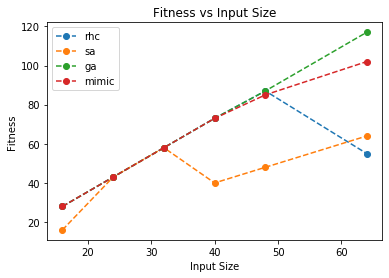

In [306]:
x = [16, 24, 32,40,48,64]
plt.plot(x, best_fitness_rhc_list,ls='--', marker='o',label = 'rhc')
plt.plot(x, best_fitness_sa_list_new2, ls='--', marker='o',label = 'sa')
plt.plot(x, best_fitness_ga_list,ls='--', marker='o', label = 'ga')
plt.plot(x, best_fitness_mimic_list_new2, ls='--', marker='o',label='mimic')
plt.legend()
plt.plot()

plt.title("Fitness vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Fitness")

# Try to update the code to include fitness vs evaluation curuve 

In [22]:
# test existing curve function 

In [18]:
def queens_max(state):
    
    #initialize global call counter 
    global eval_curves
    # Initialize counter
    fitness = 0
    
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):
                
                # If no attacks, then increment counter
                fitness += 1
    eval_curves.append(fitness)

    return fitness

In [19]:
# Define alternative N-Queens fitness function for maximization problem
eval_curves = [] 


# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)


best_state, best_fitness, fitness_curve_sa, timve_curve_sa = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = init_state, random_state = 1)

eval_curves_sa = eval_curves

In [20]:
print (len(eval_curves_sa))

698


In [22]:
print (len(timve_curve_sa))

585


In [119]:
eval_curves = [] 
best_state, best_fitness_rhc, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 0, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = init_state, random_state = 1)

eval_curves_rhc = eval_curves

In [154]:
eval_curves = [] 
best_state, best_fitness_ga, fitness_curve_ga= mlrose_hiive.genetic_alg(problem_cust, pop_size=200, pop_breed_percent=0.75, elite_dreg_ratio=0.99,
                minimum_elites=0, minimum_dregs=0, mutation_prob=0.1,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=1)

eval_curves_ga = eval_curves

In [158]:
eval_curves = [] 
best_state, best_fitness_mimic, fitness_curve_mimic= mlrose_hiive.mimic(problem_cust,  pop_size=200, keep_pct=0.2,
                max_attempts=20, max_iters=np.inf, curve=True, random_state=1)

eval_curves_mimic = eval_curves

In [ ]:
eval_curves = [] 
best_state, best_fitness_mimic, fitness_curve_mimic= mlrose_hiive.mimic(problem_cust,  pop_size=100, keep_pct=0.25,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

eval_curves_mimic = eval_curves
print (best_fitness_mimic)

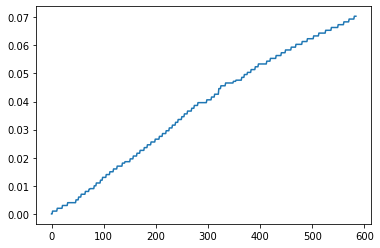

In [23]:
plt.plot(timve_curve_sa, label = 'sa')

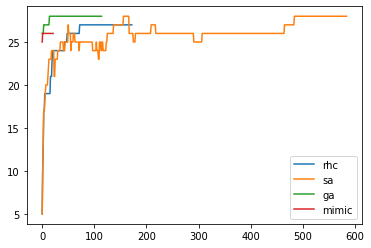

In [159]:
plt.plot(fitness_curve_rhc, label = 'rhc')
plt.plot(fitness_curve_sa, label = 'sa')
plt.plot(fitness_curve_ga, label = 'ga')
plt.plot(fitness_curve_mimic, label='mimic')
plt.legend()

In [162]:
best_fitness_mimic

26.0

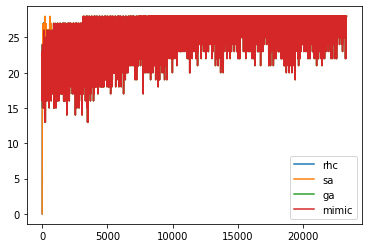

In [161]:
plt.plot(eval_curves_rhc, label = 'rhc')
plt.plot(eval_curves_sa, label = 'sa')
plt.plot(eval_curves_ga, label = 'ga')
plt.plot(eval_curves_ga, label = 'mimic')
plt.legend()

In [104]:
print (len(eval_curves_sa))

698


In [105]:
len(fitness_curve_sa)

585

### Example 3: Travelling Salesperson Using Coordinate-Defined Fitness Function

In [21]:
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

# Initialize fitness function object using coords_list
fitness_coords = mlrose_hiive.TravellingSales(coords = coords_list)

In [22]:
# Define optimization problem object
problem_fit = mlrose_hiive.TSPOpt(length = 8, fitness_fn = fitness_coords, maximize = False)

In [23]:
# Solve using genetic algorithm - attempt 1
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_fit, random_state = 2)

In [24]:
print(best_state)

[1 3 4 5 6 7 0 2]


In [25]:
print(best_fitness)

18.89580466036301


In [26]:
# Solve using genetic algorithm - attempt 2
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_fit, mutation_prob = 0.2, max_attempts = 100,
                                              random_state = 2)

In [27]:
print(best_state)

[7 6 5 4 3 2 1 0]


In [28]:
print(best_fitness)

17.34261754766733


### Example 4: Travelling Salesperson Using Distance-Defined Fitness Function

In [29]:
# Create list of distances between pairs of cities
dist_list = [(0, 1, 3.1623), (0, 2, 4.1231), (0, 3, 5.8310), (0, 4, 4.2426), (0, 5, 5.3852),
             (0, 6, 4.0000), (0, 7, 2.2361), (1, 2, 1.0000), (1, 3, 2.8284), (1, 4, 2.0000),
             (1, 5, 4.1231), (1, 6, 4.2426), (1, 7, 2.2361), (2, 3, 2.2361), (2, 4, 2.2361),
             (2, 5, 4.4721), (2, 6, 5.0000), (2, 7, 3.1623), (3, 4, 2.0000), (3, 5, 3.6056),
             (3, 6, 5.0990), (3, 7, 4.1231), (4, 5, 2.2361), (4, 6, 3.1623), (4, 7, 2.2361),
             (5, 6, 2.2361), (5, 7, 3.1623), (6, 7, 2.2361)]

# Initialize fitness function object using dist_list
fitness_dists = mlrose_hiive.TravellingSales(distances = dist_list)

In [30]:
# Define optimization problem object
problem_fit2 = mlrose_hiive.TSPOpt(length = 8, fitness_fn = fitness_dists, maximize = False)

In [31]:
# Solve using genetic algorithm
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_fit2, mutation_prob = 0.2, max_attempts = 100,
                                              random_state = 2)

In [32]:
print(best_state)

[7 6 5 4 3 2 1 0]


In [33]:
print(best_fitness)

17.3428


### Example 5: Travelling Salesperson Defining Fitness Function as Part of Optimization Problem Definition Step

In [34]:
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

# Define optimization problem object
problem_no_fit = mlrose_hiive.TSPOpt(length = 8, coords = coords_list, maximize = False)

In [35]:
# Solve using genetic algorithm
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, max_attempts = 100, 
                                              random_state = 2)

In [36]:
print(best_state)

[7 6 5 4 3 2 1 0]


In [37]:
print(best_fitness)

17.34261754766733


### Example 6: Fitting a Neural Network to the Iris Dataset

In [38]:
# Load the Iris dataset
data = load_iris()

In [39]:
# Get feature values of first observation
print(data.data[0])

[5.1 3.5 1.4 0.2]


In [40]:
# Get feature names
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [41]:
# Get target value of first observation
print(data.target[0])

0


In [42]:
# Get target name of first observation
print(data.target_names[data.target[0]])

setosa


In [43]:
# Get minimum feature values
print(np.min(data.data, axis = 0))

[4.3 2.  1.  0.1]


In [44]:
# Get maximum feature values
print(np.max(data.data, axis = 0))

[7.9 4.4 6.9 2.5]


In [45]:
# Get unique target values
print(np.unique(data.target))

[0 1 2]


In [46]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2, 
                                                    random_state = 3)

In [47]:
# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

C:\Users\ghaye\AppData\Local\conda\conda\envs\mlrose_test\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [49]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

In [50]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.45


In [51]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5333333333333333


In [52]:
# Initialize neural network object and fit object - attempt 2
nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation = 'relu', 
                                 algorithm = 'gradient_descent', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model2.fit(X_train_scaled, y_train_hot)

In [53]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.625


In [54]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5666666666666667


### Example 7: Fitting a Logistic Regression to the Iris Data

In [55]:
# Initialize logistic regression object and fit object - attempt 1
lr_model1 = mlrose_hiive.LogisticRegression(algorithm = 'random_hill_climb', max_iters = 1000, 
                                      bias = True, learning_rate = 0.0001, 
                                      early_stopping = True, clip_max = 5, max_attempts = 100, 
                                      random_state = 3)

lr_model1.fit(X_train_scaled, y_train_hot)

In [56]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.19166666666666668


In [57]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.06666666666666667


In [58]:
# Initialize logistic regression object and fit object - attempt 2

lr_model2 = mlrose_hiive.LogisticRegression(algorithm = 'random_hill_climb', max_iters = 1000, 
                                      bias = True, learning_rate = 0.01, 
                                      early_stopping = True, clip_max = 5, max_attempts = 100,
                                      random_state = 3)

lr_model2.fit(X_train_scaled, y_train_hot)

In [59]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.6833333333333333


In [60]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7


### Example 8: Fitting a Logistic Regression to the Iris Data using the NeuralNetwork() class

In [61]:
# Initialize neural network object and fit object - attempt 1
lr_nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [], activation = 'sigmoid', 
                                    algorithm = 'random_hill_climb', 
                                    max_iters = 1000, bias = True, is_classifier = True, 
                                    learning_rate = 0.0001, early_stopping = True, 
                                    clip_max = 5, max_attempts = 100, random_state = 3)

lr_nn_model1.fit(X_train_scaled, y_train_hot)

In [62]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.19166666666666668


In [63]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.06666666666666667


In [64]:
# Initialize neural network object and fit object - attempt 2
lr_nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [], activation = 'sigmoid', 
                                    algorithm = 'random_hill_climb', 
                                    max_iters = 1000, bias = True, is_classifier = True, 
                                    learning_rate = 0.01, early_stopping = True, 
                                    clip_max = 5, max_attempts = 100, random_state = 3)

lr_nn_model2.fit(X_train_scaled, y_train_hot)

In [65]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.6833333333333333


In [66]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7
